In [1]:
# ====================================
# COMP0078 Coursework 2 Q1.2, 1.3, 1.4
# Douglas Chiang
# 15055142
# ====================================
cd /Users/DouglasChiang/Google Drive_HNC/Colab Notebooks/COMP0078/CW2/Q1

/Users/DouglasChiang/Google Drive_HNC/Colab Notebooks/COMP0078/CW2/Q1


In [2]:
ls

Assignment_2_Question_1a_v3.ipynb    assignment_2_question_1f_1_v1.py
Assignment_2_Question_1e_2_v1.ipynb  dtest123.dat*
Icon?                                dtrain123.dat*
Plots/                               zipcombo.dat*
Q1 Trial.ipynb


Libraries:

In [3]:
import time
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

Functions for data

In [4]:
def load_dat(fname, Full_Data = False):
    dat = pd.read_csv(fname, sep='\s+', header=None).to_numpy()
    if Full_Data == False:
        y = dat[:, 0].astype(np.int) - 1  # we are zero-based indexing
    else:
        y = dat[:, 0].astype(np.int)
    
    X = dat[:, 1:].astype(np.float64)
    return X, y

def Plot_Accuracy_SV(Ker_para, run, n_epochs, Train_accuracy_All, Test_accuracy_All):
    fig1, ax1 = plt.subplots()

    ax1.plot(range(1, n_epochs), Train_accuracy_All, color='red', label='Training accuracy')
    ax1.plot(range(1, n_epochs), Test_accuracy_All, color='blue', label='Testing accuracy')

    plt.xlabel('Epoch(s)')
    leg = ax1.legend(bbox_to_anchor=(1.5, 1.02), loc='upper right', frameon=False)
    plt.savefig(f"/content/drive/MyDrive/Colab Notebooks/COMP0078/CW2/Q1/Plots/Q1a/d_{Ker_para}_run_{run}_Accuracy_SV.png")

def kFold(data_idx, fold, folds):
    # Return split data indices sets for k-fold validation
    
    if fold > folds - 1:
        raise Exception('fold number exceeds total folds available')
    
    m        = len(data_idx)
    size     = m // folds
    data_validate_idx = data_idx[fold*size:(fold + 1)*size]

    if fold == 0:
        # first fold
        data_train_idx = data_idx[(fold+1)*size:]

    elif fold == folds - 1:
        # last fold
        data_train_idx = data_idx[:fold*size]

    else:
        # middle fold
        data_train1_idx = data_idx[:fold*size]
        data_train2_idx = data_idx[(fold+1)*size:]
        data_train_idx  = np.concatenate((data_train1_idx, data_train2_idx), axis=0)
    
    return data_train_idx, data_validate_idx

Kernel Calculation

In [5]:
class KernelFunctor:
    """
    Calculate the Kernel values and put them in a matrix
    """
    def __init__(self, Ker_Meth="Poly", Ker_para=2):
        self.Ker_Meth = Ker_Meth
        self.Ker_para = Ker_para
        #self.X_idx = 
    
    def kernel_fn(self, X):
        if self.Ker_Meth == "Poly":
            return (X.dot(X.T))**self.Ker_para
        elif self.Ker_Meth == "Gau":
            pass# return np.exp(-self.Ker_para*np.linalg.norm(p_vec - q_vec)**2)
        else:
            assert False, "Kernel Method Undefined"

K - Class Classifier: One vs Rest Online Perceptron


In [6]:
class OvR_OnlinePerceptron:
    """
    One-vs-Rest
    """
    def __init__(self, alphas, kernel_matrix, n_classes=3):
        self.alphas              = alphas
        self.kernel_matrix       = kernel_matrix
        self.alphas              = alphas
        self.n_classes           = n_classes

    def fit(self, ran_train_sample_idx, X, y):
        n_samples, n_dim = X.shape

        # record down data
        self.n_dim                = n_dim
        self.n_samples            = range(n_samples)
        self.ran_train_sample_idx = ran_train_sample_idx
        # ------------------------------------------------------
        for i in self.n_samples:
            cls_vals           = self._get_classifier_vals(self.ran_train_sample_idx[i])
            preds              = self.sign(cls_vals)
            truth              = self._label_to_custom_onehot(y[i])
            self.alphas[:, i] -= np.where(np.multiply(cls_vals, truth) <= 0, preds, 0)

        return self.alphas

    def _get_classifier_vals(self, sample_idx):
        """
        This is the classifier:
        .. math::
            w(x) = \sum_i \alpha_i K(x_i, x) --> O(km)
        Args:
            x (np.ndarray): the input feature you would like to classify
        Return:
            An array of size (n_classes,). Each value represents the inner product
            sum between support vectors of a classifier and the incoming feature.
        """
        ret           = np.zeros((self.n_classes,))
        kernel_values = self.kernel_matrix[self.ran_train_sample_idx, sample_idx]
        ret          += self.alphas.dot(kernel_values)
        assert ret.shape == (self.n_classes,)
        return ret

    def predict(self, sample_idx):
        cls_vals = self._get_classifier_vals(sample_idx)
        return np.argmax(cls_vals)

    @staticmethod
    def sign(val):
        ret = np.where(val <= 0.0, -1, 1)
        return ret

    def _label_to_custom_onehot(self, label: int):
        """
        Similar to one-hot encoding, we mark the truth one as 1, otherwise -1
        Example:
        >>> ovrop = OvR_OnlinePerceptron(n_classes=5)
        >>> ovrop._label_to_custom_onehot(2)
        [-1, -1, 1, -1, -1]
        >>> ovrop._label_to_custom_onehot(4)
        [-1, -1, -1, -1, 1]
        """
        ret = np.full((self.n_classes,), -1)
        ret[label] = 1
        return ret

In [7]:
# Full data set:
X_dataset, Y_dataset = load_dat("zipcombo.dat", Full_Data = True)

Run: 1
d = 1
Precalculate Kernel...
**Kernel calculation finished in 1.8998 seconds
fold: 1
**Training: Epoch 1 finished in 4.5589 seconds
**Training: Epoch 2 finished in 4.9762 seconds
**Training: Epoch 3 finished in 4.0598 seconds
**Training: Epoch 4 finished in 4.6845 seconds
**Training: Epoch 5 finished in 5.0869 seconds
**Training: Epoch 6 finished in 5.0884 seconds
**Training: Epoch 7 finished in 4.3017 seconds
**Training: Epoch 8 finished in 4.5555 seconds
**Training: Epoch 9 finished in 4.3942 seconds
**Training: Epoch 10 finished in 4.2193 seconds
**Training: Epoch 11 finished in 4.5612 seconds
**Training: Epoch 12 finished in 3.8734 seconds
**Training: Epoch 13 finished in 4.5920 seconds
**Training: Epoch 14 finished in 4.1255 seconds
**Training: Epoch 15 finished in 4.1420 seconds
**Training: Epoch 16 finished in 4.2244 seconds
**Training: Epoch 17 finished in 3.9235 seconds
**Training: Epoch 18 finished in 4.0758 seconds
**Training: Epoch 19 finished in 3.8044 seconds
**Tra

**Training: Epoch 9 finished in 3.7385 seconds
**Training: Epoch 10 finished in 4.7926 seconds
**Training: Epoch 11 finished in 4.3640 seconds
**Training: Epoch 12 finished in 3.8816 seconds
**Training: Epoch 13 finished in 4.4500 seconds
**Training: Epoch 14 finished in 4.0300 seconds
**Training: Epoch 15 finished in 4.3686 seconds
**Training: Epoch 16 finished in 4.3490 seconds
**Training: Epoch 17 finished in 4.9569 seconds
**Training: Epoch 18 finished in 4.4888 seconds
**Training: Epoch 19 finished in 4.4198 seconds
**Training: Epoch 20 finished in 4.1392 seconds
fold: 5
**Training: Epoch 1 finished in 5.1132 seconds
**Training: Epoch 2 finished in 4.3895 seconds
**Training: Epoch 3 finished in 3.2345 seconds
**Training: Epoch 4 finished in 4.2721 seconds
**Training: Epoch 5 finished in 4.0599 seconds
**Training: Epoch 6 finished in 4.3960 seconds
**Training: Epoch 7 finished in 4.5701 seconds
**Training: Epoch 8 finished in 3.9123 seconds
**Training: Epoch 9 finished in 4.4348 se

**Training: Epoch 17 finished in 4.5571 seconds
**Training: Epoch 18 finished in 3.8913 seconds
**Training: Epoch 19 finished in 4.1350 seconds
**Training: Epoch 20 finished in 4.2479 seconds
fold: 3
**Training: Epoch 1 finished in 3.9464 seconds
**Training: Epoch 2 finished in 4.3879 seconds
**Training: Epoch 3 finished in 4.0554 seconds
**Training: Epoch 4 finished in 4.3417 seconds
**Training: Epoch 5 finished in 4.5904 seconds
**Training: Epoch 6 finished in 3.7042 seconds
**Training: Epoch 7 finished in 4.3064 seconds
**Training: Epoch 8 finished in 4.2625 seconds
**Training: Epoch 9 finished in 4.2980 seconds
**Training: Epoch 10 finished in 4.4615 seconds
**Training: Epoch 11 finished in 3.7785 seconds
**Training: Epoch 12 finished in 4.5298 seconds
**Training: Epoch 13 finished in 4.0693 seconds
**Training: Epoch 14 finished in 4.0778 seconds
**Training: Epoch 15 finished in 4.2124 seconds
**Training: Epoch 16 finished in 3.1906 seconds
**Training: Epoch 17 finished in 3.7603 s

**Training: Epoch 5 finished in 4.3036 seconds
**Training: Epoch 6 finished in 4.1559 seconds
**Training: Epoch 7 finished in 4.6872 seconds
**Training: Epoch 8 finished in 4.1302 seconds
**Training: Epoch 9 finished in 3.9057 seconds
**Training: Epoch 10 finished in 4.2710 seconds
**Training: Epoch 11 finished in 3.7201 seconds
**Training: Epoch 12 finished in 4.2783 seconds
**Training: Epoch 13 finished in 3.8496 seconds
**Training: Epoch 14 finished in 4.3730 seconds
**Training: Epoch 15 finished in 4.3772 seconds
**Training: Epoch 16 finished in 3.8632 seconds
**Training: Epoch 17 finished in 4.3141 seconds
**Training: Epoch 18 finished in 4.2730 seconds
**Training: Epoch 19 finished in 4.2073 seconds
**Training: Epoch 20 finished in 4.3232 seconds
fold: 2
**Training: Epoch 1 finished in 3.8877 seconds
**Training: Epoch 2 finished in 4.4410 seconds
**Training: Epoch 3 finished in 4.1990 seconds
**Training: Epoch 4 finished in 3.7860 seconds
**Training: Epoch 5 finished in 4.3688 se

**Training: Epoch 15 finished in 4.1268 seconds
**Training: Epoch 16 finished in 3.9440 seconds
**Training: Epoch 17 finished in 3.9660 seconds
**Training: Epoch 18 finished in 4.0723 seconds
**Training: Epoch 19 finished in 3.6782 seconds
**Training: Epoch 20 finished in 4.3963 seconds
fold: 5
**Training: Epoch 1 finished in 4.0827 seconds
**Training: Epoch 2 finished in 4.0613 seconds
**Training: Epoch 3 finished in 4.3490 seconds
**Training: Epoch 4 finished in 3.9565 seconds
**Training: Epoch 5 finished in 4.3898 seconds
**Training: Epoch 6 finished in 4.2081 seconds
**Training: Epoch 7 finished in 4.1018 seconds
**Training: Epoch 8 finished in 4.3296 seconds
**Training: Epoch 9 finished in 3.8261 seconds
**Training: Epoch 10 finished in 4.3916 seconds
**Training: Epoch 11 finished in 3.9850 seconds
**Training: Epoch 12 finished in 4.1303 seconds
**Training: Epoch 13 finished in 4.3298 seconds
**Training: Epoch 14 finished in 3.8623 seconds
**Training: Epoch 15 finished in 4.3934 s

**Training: Epoch 20 finished in 3.5722 seconds
fold: 2
**Training: Epoch 1 finished in 4.1594 seconds
**Training: Epoch 2 finished in 3.8921 seconds
**Training: Epoch 3 finished in 3.8817 seconds
**Training: Epoch 4 finished in 4.1983 seconds
**Training: Epoch 5 finished in 3.7118 seconds
**Training: Epoch 6 finished in 4.2691 seconds
**Training: Epoch 7 finished in 3.6528 seconds
**Training: Epoch 8 finished in 4.1218 seconds
**Training: Epoch 9 finished in 3.8988 seconds
**Training: Epoch 10 finished in 3.9901 seconds
**Training: Epoch 11 finished in 4.0504 seconds
**Training: Epoch 12 finished in 3.6426 seconds
**Training: Epoch 13 finished in 4.3082 seconds
**Training: Epoch 14 finished in 3.5716 seconds
**Training: Epoch 15 finished in 4.1614 seconds
**Training: Epoch 16 finished in 3.6078 seconds
**Training: Epoch 17 finished in 4.1766 seconds
**Training: Epoch 18 finished in 4.1337 seconds
**Training: Epoch 19 finished in 3.7650 seconds
**Training: Epoch 20 finished in 4.1893 s

**Training: Epoch 10 finished in 4.8842 seconds
**Training: Epoch 11 finished in 4.3383 seconds
**Training: Epoch 12 finished in 5.0198 seconds
**Training: Epoch 13 finished in 4.5162 seconds
**Training: Epoch 14 finished in 3.9046 seconds
**Training: Epoch 15 finished in 4.5825 seconds
**Training: Epoch 16 finished in 3.8267 seconds
**Training: Epoch 17 finished in 4.6444 seconds
**Training: Epoch 18 finished in 4.3914 seconds
**Training: Epoch 19 finished in 3.9445 seconds
**Training: Epoch 20 finished in 4.5574 seconds
d = 4
Precalculate Kernel...
**Kernel calculation finished in 7.8486 seconds
fold: 1
**Training: Epoch 1 finished in 4.7905 seconds
**Training: Epoch 2 finished in 4.1997 seconds
**Training: Epoch 3 finished in 5.0641 seconds
**Training: Epoch 4 finished in 5.5812 seconds
**Training: Epoch 5 finished in 5.7070 seconds
**Training: Epoch 6 finished in 4.4487 seconds
**Training: Epoch 7 finished in 4.4553 seconds
**Training: Epoch 8 finished in 4.1372 seconds
**Training:

**Training: Epoch 18 finished in 4.2515 seconds
**Training: Epoch 19 finished in 3.8980 seconds
**Training: Epoch 20 finished in 4.7272 seconds
fold: 4
**Training: Epoch 1 finished in 4.4393 seconds
**Training: Epoch 2 finished in 3.7871 seconds
**Training: Epoch 3 finished in 4.2985 seconds
**Training: Epoch 4 finished in 4.1009 seconds
**Training: Epoch 5 finished in 3.8070 seconds
**Training: Epoch 6 finished in 4.2594 seconds
**Training: Epoch 7 finished in 3.6971 seconds
**Training: Epoch 8 finished in 4.3194 seconds
**Training: Epoch 9 finished in 3.8419 seconds
**Training: Epoch 10 finished in 4.0784 seconds
**Training: Epoch 11 finished in 4.1901 seconds
**Training: Epoch 12 finished in 3.7458 seconds
**Training: Epoch 13 finished in 4.3627 seconds
**Training: Epoch 14 finished in 3.6801 seconds
**Training: Epoch 15 finished in 4.0085 seconds
**Training: Epoch 16 finished in 1.4254 seconds
**Training: Epoch 17 finished in 1.1730 seconds
**Training: Epoch 18 finished in 1.1791 s

**Training: Epoch 6 finished in 3.8942 seconds
**Training: Epoch 7 finished in 3.9578 seconds
**Training: Epoch 8 finished in 4.0551 seconds
**Training: Epoch 9 finished in 3.7077 seconds
**Training: Epoch 10 finished in 4.1302 seconds
**Training: Epoch 11 finished in 3.6217 seconds
**Training: Epoch 12 finished in 4.3276 seconds
**Training: Epoch 13 finished in 3.6261 seconds
**Training: Epoch 14 finished in 4.2141 seconds
**Training: Epoch 15 finished in 4.0251 seconds
**Training: Epoch 16 finished in 3.6893 seconds
**Training: Epoch 17 finished in 4.0562 seconds
**Training: Epoch 18 finished in 3.6926 seconds
**Training: Epoch 19 finished in 4.3212 seconds
**Training: Epoch 20 finished in 3.6043 seconds
fold: 3
**Training: Epoch 1 finished in 4.8182 seconds
**Training: Epoch 2 finished in 4.3318 seconds
**Training: Epoch 3 finished in 3.8281 seconds
**Training: Epoch 4 finished in 4.2020 seconds
**Training: Epoch 5 finished in 3.8617 seconds
**Training: Epoch 6 finished in 4.0242 se

**Training: Epoch 13 finished in 4.0285 seconds
**Training: Epoch 14 finished in 3.5878 seconds
**Training: Epoch 15 finished in 4.2277 seconds
**Training: Epoch 16 finished in 3.5306 seconds
**Training: Epoch 17 finished in 4.1915 seconds
**Training: Epoch 18 finished in 3.5771 seconds
**Training: Epoch 19 finished in 3.9737 seconds
**Training: Epoch 20 finished in 3.8057 seconds
fold: 5
**Training: Epoch 1 finished in 3.6133 seconds
**Training: Epoch 2 finished in 4.3195 seconds
**Training: Epoch 3 finished in 3.4357 seconds
**Training: Epoch 4 finished in 4.2421 seconds
**Training: Epoch 5 finished in 3.8706 seconds
**Training: Epoch 6 finished in 3.9465 seconds
**Training: Epoch 7 finished in 3.9439 seconds
**Training: Epoch 8 finished in 3.6524 seconds
**Training: Epoch 9 finished in 4.1355 seconds
**Training: Epoch 10 finished in 3.6300 seconds
**Training: Epoch 11 finished in 4.1572 seconds
**Training: Epoch 12 finished in 3.4813 seconds
**Training: Epoch 13 finished in 4.2602 s

fold: 3
**Training: Epoch 1 finished in 4.2030 seconds
**Training: Epoch 2 finished in 3.8087 seconds
**Training: Epoch 3 finished in 4.4405 seconds
**Training: Epoch 4 finished in 4.0073 seconds
**Training: Epoch 5 finished in 4.2442 seconds
**Training: Epoch 6 finished in 4.2517 seconds
**Training: Epoch 7 finished in 3.8434 seconds
**Training: Epoch 8 finished in 4.3080 seconds
**Training: Epoch 9 finished in 3.7464 seconds
**Training: Epoch 10 finished in 4.3473 seconds
**Training: Epoch 11 finished in 4.0640 seconds
**Training: Epoch 12 finished in 4.0377 seconds
**Training: Epoch 13 finished in 4.2869 seconds
**Training: Epoch 14 finished in 3.8264 seconds
**Training: Epoch 15 finished in 4.3264 seconds
**Training: Epoch 16 finished in 3.9248 seconds
**Training: Epoch 17 finished in 4.1349 seconds
**Training: Epoch 18 finished in 4.2654 seconds
**Training: Epoch 19 finished in 3.8506 seconds
**Training: Epoch 20 finished in 4.3061 seconds
fold: 4
**Training: Epoch 1 finished in 3

**Training: Epoch 9 finished in 4.1439 seconds
**Training: Epoch 10 finished in 3.9796 seconds
**Training: Epoch 11 finished in 4.2226 seconds
**Training: Epoch 12 finished in 3.7644 seconds
**Training: Epoch 13 finished in 4.4012 seconds
**Training: Epoch 14 finished in 3.7411 seconds
**Training: Epoch 15 finished in 4.4352 seconds
**Training: Epoch 16 finished in 4.1209 seconds
**Training: Epoch 17 finished in 3.9225 seconds
**Training: Epoch 18 finished in 4.2746 seconds
**Training: Epoch 19 finished in 3.7646 seconds
**Training: Epoch 20 finished in 4.2950 seconds
fold: 2
**Training: Epoch 1 finished in 4.1223 seconds
**Training: Epoch 2 finished in 3.7249 seconds
**Training: Epoch 3 finished in 4.3231 seconds
**Training: Epoch 4 finished in 3.5984 seconds
**Training: Epoch 5 finished in 4.2598 seconds
**Training: Epoch 6 finished in 3.8908 seconds
**Training: Epoch 7 finished in 4.0600 seconds
**Training: Epoch 8 finished in 4.1634 seconds
**Training: Epoch 9 finished in 4.0978 se

**Training: Epoch 19 finished in 4.3931 seconds
**Training: Epoch 20 finished in 3.8322 seconds
fold: 5
**Training: Epoch 1 finished in 3.9431 seconds
**Training: Epoch 2 finished in 4.4706 seconds
**Training: Epoch 3 finished in 3.6379 seconds
**Training: Epoch 4 finished in 4.4037 seconds
**Training: Epoch 5 finished in 3.9670 seconds
**Training: Epoch 6 finished in 4.3263 seconds
**Training: Epoch 7 finished in 4.5043 seconds
**Training: Epoch 8 finished in 4.5258 seconds
**Training: Epoch 9 finished in 4.2097 seconds
**Training: Epoch 10 finished in 4.1269 seconds
**Training: Epoch 11 finished in 4.2053 seconds
**Training: Epoch 12 finished in 4.0879 seconds
**Training: Epoch 13 finished in 3.9412 seconds
**Training: Epoch 14 finished in 4.6894 seconds
**Training: Epoch 15 finished in 4.1870 seconds
**Training: Epoch 16 finished in 4.6157 seconds
**Training: Epoch 17 finished in 4.3865 seconds
**Training: Epoch 18 finished in 3.9008 seconds
**Training: Epoch 19 finished in 4.3830 s

**Training: Epoch 4 finished in 4.1658 seconds
**Training: Epoch 5 finished in 4.3167 seconds
**Training: Epoch 6 finished in 3.9915 seconds
**Training: Epoch 7 finished in 4.5228 seconds
**Training: Epoch 8 finished in 3.8534 seconds
**Training: Epoch 9 finished in 4.2774 seconds
**Training: Epoch 10 finished in 4.1363 seconds
**Training: Epoch 11 finished in 4.2249 seconds
**Training: Epoch 12 finished in 4.4956 seconds
**Training: Epoch 13 finished in 4.3361 seconds
**Training: Epoch 14 finished in 4.4828 seconds
**Training: Epoch 15 finished in 4.3057 seconds
**Training: Epoch 16 finished in 4.0037 seconds
**Training: Epoch 17 finished in 4.5229 seconds
**Training: Epoch 18 finished in 3.9091 seconds
**Training: Epoch 19 finished in 4.8912 seconds
**Training: Epoch 20 finished in 4.3880 seconds
fold: 3
**Training: Epoch 1 finished in 4.2684 seconds
**Training: Epoch 2 finished in 4.9372 seconds
**Training: Epoch 3 finished in 4.3607 seconds
**Training: Epoch 4 finished in 3.8160 se

**Training: Epoch 14 finished in 4.5476 seconds
**Training: Epoch 15 finished in 4.3041 seconds
**Training: Epoch 16 finished in 3.9961 seconds
**Training: Epoch 17 finished in 4.4206 seconds
**Training: Epoch 18 finished in 3.9323 seconds
**Training: Epoch 19 finished in 4.4515 seconds
**Training: Epoch 20 finished in 4.4488 seconds
d = 3
Precalculate Kernel...
**Kernel calculation finished in 6.5831 seconds
fold: 1
**Training: Epoch 1 finished in 3.5719 seconds
**Training: Epoch 2 finished in 4.4833 seconds
**Training: Epoch 3 finished in 3.8467 seconds
**Training: Epoch 4 finished in 4.4886 seconds
**Training: Epoch 5 finished in 4.3372 seconds
**Training: Epoch 6 finished in 4.0226 seconds
**Training: Epoch 7 finished in 4.5678 seconds
**Training: Epoch 8 finished in 3.7490 seconds
**Training: Epoch 9 finished in 4.6267 seconds
**Training: Epoch 10 finished in 4.9600 seconds
**Training: Epoch 11 finished in 3.9323 seconds
**Training: Epoch 12 finished in 4.3887 seconds
**Training: 

**Training: Epoch 2 finished in 3.9962 seconds
**Training: Epoch 3 finished in 3.9955 seconds
**Training: Epoch 4 finished in 4.3815 seconds
**Training: Epoch 5 finished in 4.2734 seconds
**Training: Epoch 6 finished in 5.0513 seconds
**Training: Epoch 7 finished in 5.1951 seconds
**Training: Epoch 8 finished in 4.0245 seconds
**Training: Epoch 9 finished in 4.4361 seconds
**Training: Epoch 10 finished in 4.1367 seconds
**Training: Epoch 11 finished in 4.0529 seconds
**Training: Epoch 12 finished in 4.3972 seconds
**Training: Epoch 13 finished in 3.7648 seconds
**Training: Epoch 14 finished in 4.2239 seconds
**Training: Epoch 15 finished in 3.8257 seconds
**Training: Epoch 16 finished in 4.1609 seconds
**Training: Epoch 17 finished in 4.1740 seconds
**Training: Epoch 18 finished in 3.9798 seconds
**Training: Epoch 19 finished in 4.3255 seconds
**Training: Epoch 20 finished in 3.8298 seconds
fold: 5
**Training: Epoch 1 finished in 5.0704 seconds
**Training: Epoch 2 finished in 4.8459 se

**Training: Epoch 10 finished in 4.5329 seconds
**Training: Epoch 11 finished in 3.8555 seconds
**Training: Epoch 12 finished in 4.4842 seconds
**Training: Epoch 13 finished in 4.3988 seconds
**Training: Epoch 14 finished in 3.9124 seconds
**Training: Epoch 15 finished in 4.5342 seconds
**Training: Epoch 16 finished in 3.5789 seconds
**Training: Epoch 17 finished in 4.1433 seconds
**Training: Epoch 18 finished in 4.3566 seconds
**Training: Epoch 19 finished in 4.3690 seconds
**Training: Epoch 20 finished in 4.3642 seconds
fold: 3
**Training: Epoch 1 finished in 3.9417 seconds
**Training: Epoch 2 finished in 4.1653 seconds
**Training: Epoch 3 finished in 4.2258 seconds
**Training: Epoch 4 finished in 3.7816 seconds
**Training: Epoch 5 finished in 4.3491 seconds
**Training: Epoch 6 finished in 3.6664 seconds
**Training: Epoch 7 finished in 4.4741 seconds
**Training: Epoch 8 finished in 3.8184 seconds
**Training: Epoch 9 finished in 4.0107 seconds
**Training: Epoch 10 finished in 4.1933 s

**Training: Epoch 20 finished in 4.3658 seconds
Retrain using d* = 3...
Precalculate Kernel...
**Kernel calculation finished in 7.3844 seconds
**Training: Epoch 1 finished in 4.4812 seconds
**Training: Epoch 2 finished in 4.9067 seconds
**Training: Epoch 3 finished in 5.2533 seconds
**Training: Epoch 4 finished in 4.9080 seconds
**Training: Epoch 5 finished in 4.8833 seconds
**Training: Epoch 6 finished in 5.0446 seconds
**Training: Epoch 7 finished in 4.7872 seconds
**Training: Epoch 8 finished in 4.5563 seconds
**Training: Epoch 9 finished in 4.9524 seconds
**Training: Epoch 10 finished in 4.8403 seconds
**Training: Epoch 11 finished in 4.5386 seconds
**Training: Epoch 12 finished in 5.1671 seconds
**Training: Epoch 13 finished in 5.1348 seconds
**Training: Epoch 14 finished in 5.0743 seconds
**Training: Epoch 15 finished in 4.9713 seconds
**Training: Epoch 16 finished in 5.0081 seconds
**Training: Epoch 17 finished in 4.5875 seconds
**Training: Epoch 18 finished in 4.7738 seconds
**

**Training: Epoch 5 finished in 2.7783 seconds
**Training: Epoch 6 finished in 1.9272 seconds
**Training: Epoch 7 finished in 2.6055 seconds
**Training: Epoch 8 finished in 3.3989 seconds
**Training: Epoch 9 finished in 2.4252 seconds
**Training: Epoch 10 finished in 1.4087 seconds
**Training: Epoch 11 finished in 1.2398 seconds
**Training: Epoch 12 finished in 2.0403 seconds
**Training: Epoch 13 finished in 1.7136 seconds
**Training: Epoch 14 finished in 1.7498 seconds
**Training: Epoch 15 finished in 1.6508 seconds
**Training: Epoch 16 finished in 1.6619 seconds
**Training: Epoch 17 finished in 1.4691 seconds
**Training: Epoch 18 finished in 1.6494 seconds
**Training: Epoch 19 finished in 2.9482 seconds
**Training: Epoch 20 finished in 3.0855 seconds
fold: 4
**Training: Epoch 1 finished in 1.5276 seconds
**Training: Epoch 2 finished in 1.5413 seconds
**Training: Epoch 3 finished in 1.6832 seconds
**Training: Epoch 4 finished in 1.2680 seconds
**Training: Epoch 5 finished in 1.2755 se

**Training: Epoch 13 finished in 1.2246 seconds
**Training: Epoch 14 finished in 1.2193 seconds
**Training: Epoch 15 finished in 1.2086 seconds
**Training: Epoch 16 finished in 1.4111 seconds
**Training: Epoch 17 finished in 1.7253 seconds
**Training: Epoch 18 finished in 1.2705 seconds
**Training: Epoch 19 finished in 1.2011 seconds
**Training: Epoch 20 finished in 1.3549 seconds
fold: 2
**Training: Epoch 1 finished in 1.8731 seconds
**Training: Epoch 2 finished in 1.3886 seconds
**Training: Epoch 3 finished in 1.2374 seconds
**Training: Epoch 4 finished in 1.1995 seconds
**Training: Epoch 5 finished in 1.3049 seconds
**Training: Epoch 6 finished in 2.0983 seconds
**Training: Epoch 7 finished in 1.5921 seconds
**Training: Epoch 8 finished in 1.4237 seconds
**Training: Epoch 9 finished in 1.4964 seconds
**Training: Epoch 10 finished in 1.6835 seconds
**Training: Epoch 11 finished in 1.5198 seconds
**Training: Epoch 12 finished in 1.3266 seconds
**Training: Epoch 13 finished in 1.2349 s

**Training: Epoch 3 finished in 1.5088 seconds
**Training: Epoch 4 finished in 1.8212 seconds
**Training: Epoch 5 finished in 1.6611 seconds
**Training: Epoch 6 finished in 1.6963 seconds
**Training: Epoch 7 finished in 1.7482 seconds
**Training: Epoch 8 finished in 2.4154 seconds
**Training: Epoch 9 finished in 2.3846 seconds
**Training: Epoch 10 finished in 2.2349 seconds
**Training: Epoch 11 finished in 1.5554 seconds
**Training: Epoch 12 finished in 1.9451 seconds
**Training: Epoch 13 finished in 1.5469 seconds
**Training: Epoch 14 finished in 1.6493 seconds
**Training: Epoch 15 finished in 1.3883 seconds
**Training: Epoch 16 finished in 1.7176 seconds
**Training: Epoch 17 finished in 1.3919 seconds
**Training: Epoch 18 finished in 1.3577 seconds
**Training: Epoch 19 finished in 1.4285 seconds
**Training: Epoch 20 finished in 1.4733 seconds
d = 6
Precalculate Kernel...
**Kernel calculation finished in 3.8259 seconds
fold: 1
**Training: Epoch 1 finished in 1.1768 seconds
**Training:

**Training: Epoch 11 finished in 1.5994 seconds
**Training: Epoch 12 finished in 1.5389 seconds
**Training: Epoch 13 finished in 1.4551 seconds
**Training: Epoch 14 finished in 1.8229 seconds
**Training: Epoch 15 finished in 1.4020 seconds
**Training: Epoch 16 finished in 1.6123 seconds
**Training: Epoch 17 finished in 1.5939 seconds
**Training: Epoch 18 finished in 1.8972 seconds
**Training: Epoch 19 finished in 1.6783 seconds
**Training: Epoch 20 finished in 1.5486 seconds
fold: 4
**Training: Epoch 1 finished in 1.4141 seconds
**Training: Epoch 2 finished in 1.7698 seconds
**Training: Epoch 3 finished in 1.7769 seconds
**Training: Epoch 4 finished in 2.0691 seconds
**Training: Epoch 5 finished in 1.6035 seconds
**Training: Epoch 6 finished in 1.8173 seconds
**Training: Epoch 7 finished in 1.5912 seconds
**Training: Epoch 8 finished in 1.5967 seconds
**Training: Epoch 9 finished in 1.4790 seconds
**Training: Epoch 10 finished in 1.5279 seconds
**Training: Epoch 11 finished in 1.7733 s

**Training: Epoch 18 finished in 1.6629 seconds
**Training: Epoch 19 finished in 1.5890 seconds
**Training: Epoch 20 finished in 2.1295 seconds
d = 2
Precalculate Kernel...
**Kernel calculation finished in 1.5978 seconds
fold: 1
**Training: Epoch 1 finished in 1.4287 seconds
**Training: Epoch 2 finished in 1.5430 seconds
**Training: Epoch 3 finished in 1.9755 seconds
**Training: Epoch 4 finished in 1.6954 seconds
**Training: Epoch 5 finished in 1.6285 seconds
**Training: Epoch 6 finished in 1.4794 seconds
**Training: Epoch 7 finished in 1.8148 seconds
**Training: Epoch 8 finished in 1.6482 seconds
**Training: Epoch 9 finished in 1.5656 seconds
**Training: Epoch 10 finished in 1.5586 seconds
**Training: Epoch 11 finished in 1.5182 seconds
**Training: Epoch 12 finished in 1.8942 seconds
**Training: Epoch 13 finished in 1.6535 seconds
**Training: Epoch 14 finished in 1.6808 seconds
**Training: Epoch 15 finished in 1.6559 seconds
**Training: Epoch 16 finished in 1.9778 seconds
**Training: 

**Training: Epoch 6 finished in 1.4167 seconds
**Training: Epoch 7 finished in 1.2441 seconds
**Training: Epoch 8 finished in 1.2268 seconds
**Training: Epoch 9 finished in 1.2366 seconds
**Training: Epoch 10 finished in 1.5570 seconds
**Training: Epoch 11 finished in 1.5963 seconds
**Training: Epoch 12 finished in 1.5327 seconds
**Training: Epoch 13 finished in 1.8526 seconds
**Training: Epoch 14 finished in 1.8153 seconds
**Training: Epoch 15 finished in 1.7494 seconds
**Training: Epoch 16 finished in 1.4262 seconds
**Training: Epoch 17 finished in 1.2675 seconds
**Training: Epoch 18 finished in 1.2620 seconds
**Training: Epoch 19 finished in 1.7103 seconds
**Training: Epoch 20 finished in 1.3703 seconds
fold: 5
**Training: Epoch 1 finished in 1.2289 seconds
**Training: Epoch 2 finished in 1.2226 seconds
**Training: Epoch 3 finished in 1.1840 seconds
**Training: Epoch 4 finished in 1.7905 seconds
**Training: Epoch 5 finished in 1.6461 seconds
**Training: Epoch 6 finished in 1.5211 se

**Training: Epoch 14 finished in 1.6223 seconds
**Training: Epoch 15 finished in 1.9177 seconds
**Training: Epoch 16 finished in 1.7309 seconds
**Training: Epoch 17 finished in 1.7421 seconds
**Training: Epoch 18 finished in 1.8442 seconds
**Training: Epoch 19 finished in 3.2019 seconds
**Training: Epoch 20 finished in 3.4024 seconds
fold: 3
**Training: Epoch 1 finished in 3.0369 seconds
**Training: Epoch 2 finished in 2.0188 seconds
**Training: Epoch 3 finished in 1.6977 seconds
**Training: Epoch 4 finished in 1.5671 seconds
**Training: Epoch 5 finished in 2.1185 seconds
**Training: Epoch 6 finished in 1.9019 seconds
**Training: Epoch 7 finished in 1.8708 seconds
**Training: Epoch 8 finished in 2.1822 seconds
**Training: Epoch 9 finished in 2.1298 seconds
**Training: Epoch 10 finished in 2.1624 seconds
**Training: Epoch 11 finished in 3.2023 seconds
**Training: Epoch 12 finished in 2.3000 seconds
**Training: Epoch 13 finished in 1.9465 seconds
**Training: Epoch 14 finished in 1.5905 s

**Training: Epoch 2 finished in 1.7094 seconds
**Training: Epoch 3 finished in 1.9237 seconds
**Training: Epoch 4 finished in 1.9271 seconds
**Training: Epoch 5 finished in 1.9610 seconds
**Training: Epoch 6 finished in 2.0487 seconds
**Training: Epoch 7 finished in 2.6633 seconds
**Training: Epoch 8 finished in 1.9268 seconds
**Training: Epoch 9 finished in 1.9656 seconds
**Training: Epoch 10 finished in 2.2144 seconds
**Training: Epoch 11 finished in 2.3586 seconds
**Training: Epoch 12 finished in 1.8966 seconds
**Training: Epoch 13 finished in 1.7886 seconds
**Training: Epoch 14 finished in 2.2574 seconds
**Training: Epoch 15 finished in 1.7639 seconds
**Training: Epoch 16 finished in 1.9118 seconds
**Training: Epoch 17 finished in 1.8091 seconds
**Training: Epoch 18 finished in 2.0307 seconds
**Training: Epoch 19 finished in 1.9485 seconds
**Training: Epoch 20 finished in 1.8554 seconds
fold: 2
**Training: Epoch 1 finished in 2.4975 seconds
**Training: Epoch 2 finished in 1.9629 se

**Training: Epoch 9 finished in 1.6507 seconds
**Training: Epoch 10 finished in 2.2090 seconds
**Training: Epoch 11 finished in 1.5723 seconds
**Training: Epoch 12 finished in 1.2127 seconds
**Training: Epoch 13 finished in 1.1817 seconds
**Training: Epoch 14 finished in 1.2668 seconds
**Training: Epoch 15 finished in 1.7282 seconds
**Training: Epoch 16 finished in 1.4158 seconds
**Training: Epoch 17 finished in 1.3819 seconds
**Training: Epoch 18 finished in 3.6602 seconds
**Training: Epoch 19 finished in 3.7914 seconds
**Training: Epoch 20 finished in 4.2324 seconds
fold: 4
**Training: Epoch 1 finished in 3.5303 seconds
**Training: Epoch 2 finished in 4.2963 seconds
**Training: Epoch 3 finished in 3.9937 seconds
**Training: Epoch 4 finished in 4.2186 seconds
**Training: Epoch 5 finished in 5.0771 seconds
**Training: Epoch 6 finished in 5.3586 seconds
**Training: Epoch 7 finished in 4.0025 seconds
**Training: Epoch 8 finished in 4.2540 seconds
**Training: Epoch 9 finished in 3.9002 se

**Training: Epoch 17 finished in 4.4369 seconds
**Training: Epoch 18 finished in 3.1485 seconds
**Training: Epoch 19 finished in 5.0371 seconds
**Training: Epoch 20 finished in 6.3876 seconds
fold: 2
**Training: Epoch 1 finished in 5.0444 seconds
**Training: Epoch 2 finished in 3.9856 seconds
**Training: Epoch 3 finished in 4.4559 seconds
**Training: Epoch 4 finished in 3.7879 seconds
**Training: Epoch 5 finished in 5.1512 seconds
**Training: Epoch 6 finished in 5.0180 seconds
**Training: Epoch 7 finished in 4.2005 seconds
**Training: Epoch 8 finished in 5.2829 seconds
**Training: Epoch 9 finished in 4.5735 seconds
**Training: Epoch 10 finished in 4.1333 seconds
**Training: Epoch 11 finished in 5.4409 seconds
**Training: Epoch 12 finished in 6.2210 seconds
**Training: Epoch 13 finished in 4.7959 seconds
**Training: Epoch 14 finished in 4.7154 seconds
**Training: Epoch 15 finished in 5.0241 seconds
**Training: Epoch 16 finished in 4.1328 seconds
**Training: Epoch 17 finished in 4.3887 s

**Training: Epoch 7 finished in 5.0577 seconds
**Training: Epoch 8 finished in 4.1310 seconds
**Training: Epoch 9 finished in 4.6895 seconds
**Training: Epoch 10 finished in 4.5506 seconds
**Training: Epoch 11 finished in 3.9321 seconds
**Training: Epoch 12 finished in 4.4447 seconds
**Training: Epoch 13 finished in 3.6323 seconds
**Training: Epoch 14 finished in 4.0611 seconds
**Training: Epoch 15 finished in 4.1887 seconds
**Training: Epoch 16 finished in 3.9837 seconds
**Training: Epoch 17 finished in 4.3933 seconds
**Training: Epoch 18 finished in 3.8266 seconds
**Training: Epoch 19 finished in 4.3007 seconds
**Training: Epoch 20 finished in 3.9923 seconds
d = 5
Precalculate Kernel...
**Kernel calculation finished in 6.2186 seconds
fold: 1
**Training: Epoch 1 finished in 4.0333 seconds
**Training: Epoch 2 finished in 4.2874 seconds
**Training: Epoch 3 finished in 3.7399 seconds
**Training: Epoch 4 finished in 4.2611 seconds
**Training: Epoch 5 finished in 3.6848 seconds
**Training:

**Training: Epoch 15 finished in 3.7840 seconds
**Training: Epoch 16 finished in 4.3599 seconds
**Training: Epoch 17 finished in 3.5392 seconds
**Training: Epoch 18 finished in 5.2436 seconds
**Training: Epoch 19 finished in 5.6320 seconds
**Training: Epoch 20 finished in 4.2602 seconds
fold: 4
**Training: Epoch 1 finished in 3.9832 seconds
**Training: Epoch 2 finished in 4.3185 seconds
**Training: Epoch 3 finished in 3.7753 seconds
**Training: Epoch 4 finished in 4.5138 seconds
**Training: Epoch 5 finished in 3.8395 seconds
**Training: Epoch 6 finished in 4.3182 seconds
**Training: Epoch 7 finished in 4.2867 seconds
**Training: Epoch 8 finished in 3.9658 seconds
**Training: Epoch 9 finished in 4.3263 seconds
**Training: Epoch 10 finished in 3.8063 seconds
**Training: Epoch 11 finished in 4.3689 seconds
**Training: Epoch 12 finished in 4.0234 seconds
**Training: Epoch 13 finished in 4.0687 seconds
**Training: Epoch 14 finished in 3.8748 seconds
**Training: Epoch 15 finished in 3.7482 s

**Kernel calculation finished in 2.0101 seconds
fold: 1
**Training: Epoch 1 finished in 4.2743 seconds
**Training: Epoch 2 finished in 3.8047 seconds
**Training: Epoch 3 finished in 4.2039 seconds
**Training: Epoch 4 finished in 4.0988 seconds
**Training: Epoch 5 finished in 3.8044 seconds
**Training: Epoch 6 finished in 4.2413 seconds
**Training: Epoch 7 finished in 3.6728 seconds
**Training: Epoch 8 finished in 4.1590 seconds
**Training: Epoch 9 finished in 3.6366 seconds
**Training: Epoch 10 finished in 4.1448 seconds
**Training: Epoch 11 finished in 3.9958 seconds
**Training: Epoch 12 finished in 3.8365 seconds
**Training: Epoch 13 finished in 4.2181 seconds
**Training: Epoch 14 finished in 3.7618 seconds
**Training: Epoch 15 finished in 4.4428 seconds
**Training: Epoch 16 finished in 3.8057 seconds
**Training: Epoch 17 finished in 4.1896 seconds
**Training: Epoch 18 finished in 3.8027 seconds
**Training: Epoch 19 finished in 3.8186 seconds
**Training: Epoch 20 finished in 4.2046 s

**Training: Epoch 10 finished in 3.9573 seconds
**Training: Epoch 11 finished in 4.3999 seconds
**Training: Epoch 12 finished in 3.7711 seconds
**Training: Epoch 13 finished in 4.3777 seconds
**Training: Epoch 14 finished in 3.8594 seconds
**Training: Epoch 15 finished in 4.0881 seconds
**Training: Epoch 16 finished in 4.2188 seconds
**Training: Epoch 17 finished in 3.9357 seconds
**Training: Epoch 18 finished in 4.2771 seconds
**Training: Epoch 19 finished in 3.8107 seconds
**Training: Epoch 20 finished in 4.3011 seconds
fold: 5
**Training: Epoch 1 finished in 2.6909 seconds
**Training: Epoch 2 finished in 4.3563 seconds
**Training: Epoch 3 finished in 4.3696 seconds
**Training: Epoch 4 finished in 3.8221 seconds
**Training: Epoch 5 finished in 4.2795 seconds
**Training: Epoch 6 finished in 3.8099 seconds
**Training: Epoch 7 finished in 4.3700 seconds
**Training: Epoch 8 finished in 4.1605 seconds
**Training: Epoch 9 finished in 3.9941 seconds
**Training: Epoch 10 finished in 4.2605 s

**Training: Epoch 18 finished in 3.9997 seconds
**Training: Epoch 19 finished in 4.2265 seconds
**Training: Epoch 20 finished in 1.9844 seconds
fold: 3
**Training: Epoch 1 finished in 3.9902 seconds
**Training: Epoch 2 finished in 3.9348 seconds
**Training: Epoch 3 finished in 4.2011 seconds
**Training: Epoch 4 finished in 3.6181 seconds
**Training: Epoch 5 finished in 4.3524 seconds
**Training: Epoch 6 finished in 3.7642 seconds
**Training: Epoch 7 finished in 4.3604 seconds
**Training: Epoch 8 finished in 3.8914 seconds
**Training: Epoch 9 finished in 4.1402 seconds
**Training: Epoch 10 finished in 4.3197 seconds
**Training: Epoch 11 finished in 3.7849 seconds
**Training: Epoch 12 finished in 4.3145 seconds
**Training: Epoch 13 finished in 3.7854 seconds
**Training: Epoch 14 finished in 4.4227 seconds
**Training: Epoch 15 finished in 3.8908 seconds
**Training: Epoch 16 finished in 4.2905 seconds
**Training: Epoch 17 finished in 4.3412 seconds
**Training: Epoch 18 finished in 3.9092 s

**Training: Epoch 6 finished in 3.7989 seconds
**Training: Epoch 7 finished in 4.3809 seconds
**Training: Epoch 8 finished in 3.6459 seconds
**Training: Epoch 9 finished in 4.2870 seconds
**Training: Epoch 10 finished in 3.8874 seconds
**Training: Epoch 11 finished in 4.0005 seconds
**Training: Epoch 12 finished in 4.0443 seconds
**Training: Epoch 13 finished in 3.8900 seconds
**Training: Epoch 14 finished in 4.1522 seconds
**Training: Epoch 15 finished in 3.7221 seconds
**Training: Epoch 16 finished in 4.3713 seconds
**Training: Epoch 17 finished in 3.5816 seconds
**Training: Epoch 18 finished in 4.2116 seconds
**Training: Epoch 19 finished in 3.8887 seconds
**Training: Epoch 20 finished in 3.9417 seconds
fold: 2
**Training: Epoch 1 finished in 5.2001 seconds
**Training: Epoch 2 finished in 3.6661 seconds
**Training: Epoch 3 finished in 4.2375 seconds
**Training: Epoch 4 finished in 4.3437 seconds
**Training: Epoch 5 finished in 3.7729 seconds
**Training: Epoch 6 finished in 4.6717 se

**Training: Epoch 16 finished in 3.5337 seconds
**Training: Epoch 17 finished in 4.3071 seconds
**Training: Epoch 18 finished in 3.5947 seconds
**Training: Epoch 19 finished in 4.3508 seconds
**Training: Epoch 20 finished in 3.8742 seconds
fold: 5
**Training: Epoch 1 finished in 3.7815 seconds
**Training: Epoch 2 finished in 4.2033 seconds
**Training: Epoch 3 finished in 3.5132 seconds
**Training: Epoch 4 finished in 4.2975 seconds
**Training: Epoch 5 finished in 3.4901 seconds
**Training: Epoch 6 finished in 4.5862 seconds
**Training: Epoch 7 finished in 4.0154 seconds
**Training: Epoch 8 finished in 3.9532 seconds
**Training: Epoch 9 finished in 4.2352 seconds
**Training: Epoch 10 finished in 3.6821 seconds
**Training: Epoch 11 finished in 4.2060 seconds
**Training: Epoch 12 finished in 3.4765 seconds
**Training: Epoch 13 finished in 4.2649 seconds
**Training: Epoch 14 finished in 3.6828 seconds
**Training: Epoch 15 finished in 4.2061 seconds
**Training: Epoch 16 finished in 3.7253 s

fold: 2
**Training: Epoch 1 finished in 5.4126 seconds
**Training: Epoch 2 finished in 4.7139 seconds
**Training: Epoch 3 finished in 4.2591 seconds
**Training: Epoch 4 finished in 4.1743 seconds
**Training: Epoch 5 finished in 3.9187 seconds
**Training: Epoch 6 finished in 4.5130 seconds
**Training: Epoch 7 finished in 4.3991 seconds
**Training: Epoch 8 finished in 4.9447 seconds
**Training: Epoch 9 finished in 5.0424 seconds
**Training: Epoch 10 finished in 5.2917 seconds
**Training: Epoch 11 finished in 4.9076 seconds
**Training: Epoch 12 finished in 4.7587 seconds
**Training: Epoch 13 finished in 5.4638 seconds
**Training: Epoch 14 finished in 4.2973 seconds
**Training: Epoch 15 finished in 4.8865 seconds
**Training: Epoch 16 finished in 4.7101 seconds
**Training: Epoch 17 finished in 4.9349 seconds
**Training: Epoch 18 finished in 5.7467 seconds
**Training: Epoch 19 finished in 5.2703 seconds
**Training: Epoch 20 finished in 4.2614 seconds
fold: 3
**Training: Epoch 1 finished in 4

**Training: Epoch 11 finished in 4.6782 seconds
**Training: Epoch 12 finished in 4.6637 seconds
**Training: Epoch 13 finished in 4.4587 seconds
**Training: Epoch 14 finished in 4.3417 seconds
**Training: Epoch 15 finished in 5.4084 seconds
**Training: Epoch 16 finished in 4.5178 seconds
**Training: Epoch 17 finished in 5.1692 seconds
**Training: Epoch 18 finished in 4.6984 seconds
**Training: Epoch 19 finished in 4.2836 seconds
**Training: Epoch 20 finished in 4.9367 seconds
d = 4
Precalculate Kernel...
**Kernel calculation finished in 7.5364 seconds
fold: 1
**Training: Epoch 1 finished in 4.7587 seconds
**Training: Epoch 2 finished in 5.8753 seconds
**Training: Epoch 3 finished in 5.1508 seconds
**Training: Epoch 4 finished in 5.1522 seconds
**Training: Epoch 5 finished in 4.7821 seconds
**Training: Epoch 6 finished in 3.9571 seconds
**Training: Epoch 7 finished in 4.6435 seconds
**Training: Epoch 8 finished in 4.7685 seconds
**Training: Epoch 9 finished in 4.5135 seconds
**Training: 

**Training: Epoch 19 finished in 5.0181 seconds
**Training: Epoch 20 finished in 3.9210 seconds
fold: 4
**Training: Epoch 1 finished in 4.3788 seconds
**Training: Epoch 2 finished in 3.6257 seconds
**Training: Epoch 3 finished in 4.5970 seconds
**Training: Epoch 4 finished in 1.8322 seconds
**Training: Epoch 5 finished in 1.5539 seconds
**Training: Epoch 6 finished in 1.7933 seconds
**Training: Epoch 7 finished in 1.4608 seconds
**Training: Epoch 8 finished in 3.7077 seconds
**Training: Epoch 9 finished in 4.3750 seconds
**Training: Epoch 10 finished in 4.8472 seconds
**Training: Epoch 11 finished in 4.2379 seconds
**Training: Epoch 12 finished in 4.4814 seconds
**Training: Epoch 13 finished in 4.5324 seconds
**Training: Epoch 14 finished in 4.1247 seconds
**Training: Epoch 15 finished in 4.6294 seconds
**Training: Epoch 16 finished in 4.0992 seconds
**Training: Epoch 17 finished in 4.3347 seconds
**Training: Epoch 18 finished in 4.2762 seconds
**Training: Epoch 19 finished in 4.0314 s

**Training: Epoch 7 finished in 4.4909 seconds
**Training: Epoch 8 finished in 4.2198 seconds
**Training: Epoch 9 finished in 4.5143 seconds
**Training: Epoch 10 finished in 4.3137 seconds
**Training: Epoch 11 finished in 4.5341 seconds
**Training: Epoch 12 finished in 4.4740 seconds
**Training: Epoch 13 finished in 3.7703 seconds
**Training: Epoch 14 finished in 4.4960 seconds
**Training: Epoch 15 finished in 4.2457 seconds
**Training: Epoch 16 finished in 4.2257 seconds
**Training: Epoch 17 finished in 4.6064 seconds
**Training: Epoch 18 finished in 3.9565 seconds
**Training: Epoch 19 finished in 4.3533 seconds
**Training: Epoch 20 finished in 4.1679 seconds
fold: 3
**Training: Epoch 1 finished in 4.1229 seconds
**Training: Epoch 2 finished in 4.5700 seconds
**Training: Epoch 3 finished in 3.8190 seconds
**Training: Epoch 4 finished in 4.8653 seconds
**Training: Epoch 5 finished in 4.5048 seconds
**Training: Epoch 6 finished in 4.1185 seconds
**Training: Epoch 7 finished in 4.5492 se

**Training: Epoch 14 finished in 4.3164 seconds
**Training: Epoch 15 finished in 4.8658 seconds
**Training: Epoch 16 finished in 4.9286 seconds
**Training: Epoch 17 finished in 7.4966 seconds
**Training: Epoch 18 finished in 4.4555 seconds
**Training: Epoch 19 finished in 4.6033 seconds
**Training: Epoch 20 finished in 4.9449 seconds
fold: 5
**Training: Epoch 1 finished in 4.7408 seconds
**Training: Epoch 2 finished in 4.2197 seconds
**Training: Epoch 3 finished in 4.6776 seconds
**Training: Epoch 4 finished in 4.2069 seconds
**Training: Epoch 5 finished in 5.2170 seconds
**Training: Epoch 6 finished in 4.4905 seconds
**Training: Epoch 7 finished in 3.9878 seconds
**Training: Epoch 8 finished in 3.7031 seconds
**Training: Epoch 9 finished in 4.2957 seconds
**Training: Epoch 10 finished in 4.1488 seconds
**Training: Epoch 11 finished in 5.5658 seconds
**Training: Epoch 12 finished in 4.8607 seconds
**Training: Epoch 13 finished in 4.7138 seconds
**Training: Epoch 14 finished in 5.0436 s

**Training: Epoch 2 finished in 4.4522 seconds
**Training: Epoch 3 finished in 3.7543 seconds
**Training: Epoch 4 finished in 4.3327 seconds
**Training: Epoch 5 finished in 4.0992 seconds
**Training: Epoch 6 finished in 4.0484 seconds
**Training: Epoch 7 finished in 4.3121 seconds
**Training: Epoch 8 finished in 3.8348 seconds
**Training: Epoch 9 finished in 4.4527 seconds
**Training: Epoch 10 finished in 3.9202 seconds
**Training: Epoch 11 finished in 4.1599 seconds
**Training: Epoch 12 finished in 4.2472 seconds
**Training: Epoch 13 finished in 3.9449 seconds
**Training: Epoch 14 finished in 4.4680 seconds
**Training: Epoch 15 finished in 3.8762 seconds
**Training: Epoch 16 finished in 4.4463 seconds
**Training: Epoch 17 finished in 4.2631 seconds
**Training: Epoch 18 finished in 4.2112 seconds
**Training: Epoch 19 finished in 4.3586 seconds
**Training: Epoch 20 finished in 3.7576 seconds
fold: 4
**Training: Epoch 1 finished in 4.3685 seconds
**Training: Epoch 2 finished in 4.1347 se

**Training: Epoch 10 finished in 5.4901 seconds
**Training: Epoch 11 finished in 5.4729 seconds
**Training: Epoch 12 finished in 4.0176 seconds
**Training: Epoch 13 finished in 3.3039 seconds
**Training: Epoch 14 finished in 3.9298 seconds
**Training: Epoch 15 finished in 4.3628 seconds
**Training: Epoch 16 finished in 2.0507 seconds
**Training: Epoch 17 finished in 3.4982 seconds
**Training: Epoch 18 finished in 2.5356 seconds
**Training: Epoch 19 finished in 1.6357 seconds
**Training: Epoch 20 finished in 2.4393 seconds
fold: 2
**Training: Epoch 1 finished in 4.3683 seconds
**Training: Epoch 2 finished in 3.4732 seconds
**Training: Epoch 3 finished in 3.2755 seconds
**Training: Epoch 4 finished in 4.0441 seconds
**Training: Epoch 5 finished in 2.8633 seconds
**Training: Epoch 6 finished in 3.8003 seconds
**Training: Epoch 7 finished in 2.9829 seconds
**Training: Epoch 8 finished in 3.4175 seconds
**Training: Epoch 9 finished in 3.2242 seconds
**Training: Epoch 10 finished in 3.3654 s

**Training: Epoch 20 finished in 5.2358 seconds
fold: 5
**Training: Epoch 1 finished in 4.7333 seconds
**Training: Epoch 2 finished in 4.5873 seconds
**Training: Epoch 3 finished in 5.9387 seconds
**Training: Epoch 4 finished in 3.0800 seconds
**Training: Epoch 5 finished in 4.7312 seconds
**Training: Epoch 6 finished in 4.5026 seconds
**Training: Epoch 7 finished in 4.1285 seconds
**Training: Epoch 8 finished in 4.2937 seconds
**Training: Epoch 9 finished in 3.4119 seconds
**Training: Epoch 10 finished in 3.9052 seconds
**Training: Epoch 11 finished in 3.1231 seconds
**Training: Epoch 12 finished in 4.4989 seconds
**Training: Epoch 13 finished in 4.5321 seconds
**Training: Epoch 14 finished in 4.9657 seconds
**Training: Epoch 15 finished in 7.3877 seconds
**Training: Epoch 16 finished in 5.6962 seconds
**Training: Epoch 17 finished in 7.2476 seconds
**Training: Epoch 18 finished in 7.4449 seconds
**Training: Epoch 19 finished in 7.0907 seconds
**Training: Epoch 20 finished in 4.7382 s

**Training: Epoch 5 finished in 3.3181 seconds
**Training: Epoch 6 finished in 2.8929 seconds
**Training: Epoch 7 finished in 3.5627 seconds
**Training: Epoch 8 finished in 3.0936 seconds
**Training: Epoch 9 finished in 3.8798 seconds
**Training: Epoch 10 finished in 2.6219 seconds
**Training: Epoch 11 finished in 3.7095 seconds
**Training: Epoch 12 finished in 2.7208 seconds
**Training: Epoch 13 finished in 3.3502 seconds
**Training: Epoch 14 finished in 3.0129 seconds
**Training: Epoch 15 finished in 2.9646 seconds
**Training: Epoch 16 finished in 3.3513 seconds
**Training: Epoch 17 finished in 2.5557 seconds
**Training: Epoch 18 finished in 3.6838 seconds
**Training: Epoch 19 finished in 2.6473 seconds
**Training: Epoch 20 finished in 3.8249 seconds
fold: 3
**Training: Epoch 1 finished in 2.8414 seconds
**Training: Epoch 2 finished in 3.8361 seconds
**Training: Epoch 3 finished in 2.8229 seconds
**Training: Epoch 4 finished in 3.5121 seconds
**Training: Epoch 5 finished in 3.0565 se

**Training: Epoch 15 finished in 3.6653 seconds
**Training: Epoch 16 finished in 2.8553 seconds
**Training: Epoch 17 finished in 2.7973 seconds
**Training: Epoch 18 finished in 3.4966 seconds
**Training: Epoch 19 finished in 2.8640 seconds
**Training: Epoch 20 finished in 3.6835 seconds
d = 3
Precalculate Kernel...
**Kernel calculation finished in 5.2139 seconds
fold: 1
**Training: Epoch 1 finished in 2.5857 seconds
**Training: Epoch 2 finished in 3.0985 seconds
**Training: Epoch 3 finished in 3.2470 seconds
**Training: Epoch 4 finished in 2.6170 seconds
**Training: Epoch 5 finished in 3.7709 seconds
**Training: Epoch 6 finished in 2.7096 seconds
**Training: Epoch 7 finished in 3.7435 seconds
**Training: Epoch 8 finished in 2.7414 seconds
**Training: Epoch 9 finished in 3.4919 seconds
**Training: Epoch 10 finished in 2.9187 seconds
**Training: Epoch 11 finished in 2.7347 seconds
**Training: Epoch 12 finished in 3.5278 seconds
**Training: Epoch 13 finished in 2.6245 seconds
**Training: 

**Training: Epoch 3 finished in 2.6082 seconds
**Training: Epoch 4 finished in 3.6487 seconds
**Training: Epoch 5 finished in 2.6718 seconds
**Training: Epoch 6 finished in 3.1394 seconds
**Training: Epoch 7 finished in 3.3048 seconds
**Training: Epoch 8 finished in 2.8669 seconds
**Training: Epoch 9 finished in 4.3755 seconds
**Training: Epoch 10 finished in 3.6789 seconds
**Training: Epoch 11 finished in 3.3818 seconds
**Training: Epoch 12 finished in 2.6375 seconds
**Training: Epoch 13 finished in 3.7263 seconds
**Training: Epoch 14 finished in 3.4530 seconds
**Training: Epoch 15 finished in 4.5904 seconds
**Training: Epoch 16 finished in 3.5914 seconds
**Training: Epoch 17 finished in 3.7216 seconds
**Training: Epoch 18 finished in 2.6560 seconds
**Training: Epoch 19 finished in 3.9521 seconds
**Training: Epoch 20 finished in 2.9581 seconds
fold: 5
**Training: Epoch 1 finished in 4.5595 seconds
**Training: Epoch 2 finished in 3.3714 seconds
**Training: Epoch 3 finished in 3.5877 se

**Training: Epoch 11 finished in 6.2004 seconds
**Training: Epoch 12 finished in 5.6079 seconds
**Training: Epoch 13 finished in 4.1977 seconds
**Training: Epoch 14 finished in 4.2052 seconds
**Training: Epoch 15 finished in 4.4323 seconds
**Training: Epoch 16 finished in 3.5165 seconds
**Training: Epoch 17 finished in 4.6400 seconds
**Training: Epoch 18 finished in 4.0260 seconds
**Training: Epoch 19 finished in 5.0291 seconds
**Training: Epoch 20 finished in 3.7908 seconds
fold: 3
**Training: Epoch 1 finished in 3.4165 seconds
**Training: Epoch 2 finished in 4.3984 seconds
**Training: Epoch 3 finished in 4.1657 seconds
**Training: Epoch 4 finished in 3.9344 seconds
**Training: Epoch 5 finished in 3.2978 seconds
**Training: Epoch 6 finished in 4.6183 seconds
**Training: Epoch 7 finished in 3.1967 seconds
**Training: Epoch 8 finished in 3.5339 seconds
**Training: Epoch 9 finished in 2.8863 seconds
**Training: Epoch 10 finished in 3.7981 seconds
**Training: Epoch 11 finished in 2.8931 s

Retrain using d* = 6...
Precalculate Kernel...
**Kernel calculation finished in 3.5840 seconds
**Training: Epoch 1 finished in 1.3301 seconds
**Training: Epoch 2 finished in 1.3596 seconds
**Training: Epoch 3 finished in 1.4252 seconds
**Training: Epoch 4 finished in 1.5492 seconds
**Training: Epoch 5 finished in 1.8471 seconds
**Training: Epoch 6 finished in 1.5885 seconds
**Training: Epoch 7 finished in 1.3836 seconds
**Training: Epoch 8 finished in 1.3687 seconds
**Training: Epoch 9 finished in 1.7671 seconds
**Training: Epoch 10 finished in 1.5956 seconds
**Training: Epoch 11 finished in 1.3236 seconds
**Training: Epoch 12 finished in 1.3394 seconds
**Training: Epoch 13 finished in 1.2618 seconds
**Training: Epoch 14 finished in 1.8735 seconds
**Training: Epoch 15 finished in 1.4667 seconds
**Training: Epoch 16 finished in 1.2988 seconds
**Training: Epoch 17 finished in 1.2704 seconds
**Training: Epoch 18 finished in 1.5210 seconds
**Training: Epoch 19 finished in 1.7602 seconds
**

**Training: Epoch 6 finished in 1.0937 seconds
**Training: Epoch 7 finished in 1.0812 seconds
**Training: Epoch 8 finished in 1.1079 seconds
**Training: Epoch 9 finished in 1.5942 seconds
**Training: Epoch 10 finished in 1.2226 seconds
**Training: Epoch 11 finished in 1.1397 seconds
**Training: Epoch 12 finished in 1.1282 seconds
**Training: Epoch 13 finished in 1.1399 seconds
**Training: Epoch 14 finished in 1.3719 seconds
**Training: Epoch 15 finished in 1.4785 seconds
**Training: Epoch 16 finished in 1.2454 seconds
**Training: Epoch 17 finished in 1.1338 seconds
**Training: Epoch 18 finished in 1.1484 seconds
**Training: Epoch 19 finished in 1.0992 seconds
**Training: Epoch 20 finished in 1.4106 seconds
fold: 4
**Training: Epoch 1 finished in 1.1916 seconds
**Training: Epoch 2 finished in 1.0813 seconds
**Training: Epoch 3 finished in 1.1348 seconds
**Training: Epoch 4 finished in 1.0975 seconds
**Training: Epoch 5 finished in 1.2550 seconds
**Training: Epoch 6 finished in 1.5310 se

**Training: Epoch 14 finished in 1.2444 seconds
**Training: Epoch 15 finished in 1.0776 seconds
**Training: Epoch 16 finished in 1.1082 seconds
**Training: Epoch 17 finished in 1.0551 seconds
**Training: Epoch 18 finished in 1.3331 seconds
**Training: Epoch 19 finished in 1.4475 seconds
**Training: Epoch 20 finished in 1.2057 seconds
fold: 2
**Training: Epoch 1 finished in 1.0506 seconds
**Training: Epoch 2 finished in 1.0314 seconds
**Training: Epoch 3 finished in 1.0591 seconds
**Training: Epoch 4 finished in 1.5492 seconds
**Training: Epoch 5 finished in 1.3138 seconds
**Training: Epoch 6 finished in 1.1458 seconds
**Training: Epoch 7 finished in 1.0750 seconds
**Training: Epoch 8 finished in 1.0745 seconds
**Training: Epoch 9 finished in 1.2284 seconds
**Training: Epoch 10 finished in 1.5033 seconds
**Training: Epoch 11 finished in 1.1885 seconds
**Training: Epoch 12 finished in 1.1131 seconds
**Training: Epoch 13 finished in 1.1636 seconds
**Training: Epoch 14 finished in 1.1352 s

**Training: Epoch 4 finished in 1.0727 seconds
**Training: Epoch 5 finished in 1.0663 seconds
**Training: Epoch 6 finished in 1.5340 seconds
**Training: Epoch 7 finished in 1.3084 seconds
**Training: Epoch 8 finished in 1.2791 seconds
**Training: Epoch 9 finished in 1.2076 seconds
**Training: Epoch 10 finished in 1.0767 seconds
**Training: Epoch 11 finished in 1.1900 seconds
**Training: Epoch 12 finished in 1.5770 seconds
**Training: Epoch 13 finished in 1.3976 seconds
**Training: Epoch 14 finished in 1.3414 seconds
**Training: Epoch 15 finished in 1.1198 seconds
**Training: Epoch 16 finished in 1.0718 seconds
**Training: Epoch 17 finished in 1.5479 seconds
**Training: Epoch 18 finished in 1.3202 seconds
**Training: Epoch 19 finished in 1.2024 seconds
**Training: Epoch 20 finished in 1.0844 seconds
d = 6
Precalculate Kernel...
**Kernel calculation finished in 3.6096 seconds
fold: 1
**Training: Epoch 1 finished in 1.0563 seconds
**Training: Epoch 2 finished in 1.0356 seconds
**Training:

**Training: Epoch 12 finished in 1.1954 seconds
**Training: Epoch 13 finished in 1.3025 seconds
**Training: Epoch 14 finished in 1.0833 seconds
**Training: Epoch 15 finished in 1.0721 seconds
**Training: Epoch 16 finished in 1.5590 seconds
**Training: Epoch 17 finished in 1.4370 seconds
**Training: Epoch 18 finished in 1.3788 seconds
**Training: Epoch 19 finished in 1.1873 seconds
**Training: Epoch 20 finished in 1.2905 seconds
fold: 4
**Training: Epoch 1 finished in 1.6432 seconds
**Training: Epoch 2 finished in 1.3453 seconds
**Training: Epoch 3 finished in 1.4921 seconds
**Training: Epoch 4 finished in 2.8083 seconds
**Training: Epoch 5 finished in 2.5576 seconds
**Training: Epoch 6 finished in 1.9879 seconds
**Training: Epoch 7 finished in 2.4374 seconds
**Training: Epoch 8 finished in 3.4188 seconds
**Training: Epoch 9 finished in 3.2917 seconds
**Training: Epoch 10 finished in 1.3404 seconds
**Training: Epoch 11 finished in 1.6948 seconds
**Training: Epoch 12 finished in 1.4058 s

**Training: Epoch 19 finished in 1.1110 seconds
**Training: Epoch 20 finished in 1.1206 seconds
d = 2
Precalculate Kernel...
**Kernel calculation finished in 1.4246 seconds
fold: 1
**Training: Epoch 1 finished in 1.1581 seconds
**Training: Epoch 2 finished in 1.1153 seconds
**Training: Epoch 3 finished in 1.1853 seconds
**Training: Epoch 4 finished in 1.2297 seconds
**Training: Epoch 5 finished in 1.5455 seconds
**Training: Epoch 6 finished in 1.4370 seconds
**Training: Epoch 7 finished in 1.4327 seconds
**Training: Epoch 8 finished in 1.2136 seconds
**Training: Epoch 9 finished in 1.1900 seconds
**Training: Epoch 10 finished in 1.4407 seconds
**Training: Epoch 11 finished in 1.5380 seconds
**Training: Epoch 12 finished in 1.2928 seconds
**Training: Epoch 13 finished in 1.3056 seconds
**Training: Epoch 14 finished in 1.1737 seconds
**Training: Epoch 15 finished in 1.2585 seconds
**Training: Epoch 16 finished in 1.8568 seconds
**Training: Epoch 17 finished in 1.3554 seconds
**Training: 

**Training: Epoch 7 finished in 1.2384 seconds
**Training: Epoch 8 finished in 1.1866 seconds
**Training: Epoch 9 finished in 1.1238 seconds
**Training: Epoch 10 finished in 2.3017 seconds
**Training: Epoch 11 finished in 2.9915 seconds
**Training: Epoch 12 finished in 1.8884 seconds
**Training: Epoch 13 finished in 1.5608 seconds
**Training: Epoch 14 finished in 1.5487 seconds
**Training: Epoch 15 finished in 1.6169 seconds
**Training: Epoch 16 finished in 2.8491 seconds
**Training: Epoch 17 finished in 2.2189 seconds
**Training: Epoch 18 finished in 1.5416 seconds
**Training: Epoch 19 finished in 1.7823 seconds
**Training: Epoch 20 finished in 1.4430 seconds
fold: 5
**Training: Epoch 1 finished in 1.8060 seconds
**Training: Epoch 2 finished in 1.4669 seconds
**Training: Epoch 3 finished in 1.3771 seconds
**Training: Epoch 4 finished in 1.3392 seconds
**Training: Epoch 5 finished in 1.3134 seconds
**Training: Epoch 6 finished in 1.5375 seconds
**Training: Epoch 7 finished in 1.3071 se

**Training: Epoch 15 finished in 1.4158 seconds
**Training: Epoch 16 finished in 1.3155 seconds
**Training: Epoch 17 finished in 1.4157 seconds
**Training: Epoch 18 finished in 1.2673 seconds
**Training: Epoch 19 finished in 1.7108 seconds
**Training: Epoch 20 finished in 1.5906 seconds
fold: 3
**Training: Epoch 1 finished in 1.4638 seconds
**Training: Epoch 2 finished in 1.3183 seconds
**Training: Epoch 3 finished in 1.3261 seconds
**Training: Epoch 4 finished in 1.6052 seconds
**Training: Epoch 5 finished in 1.3106 seconds
**Training: Epoch 6 finished in 1.4677 seconds
**Training: Epoch 7 finished in 1.4249 seconds
**Training: Epoch 8 finished in 1.4832 seconds
**Training: Epoch 9 finished in 2.3151 seconds
**Training: Epoch 10 finished in 1.4651 seconds
**Training: Epoch 11 finished in 1.3852 seconds
**Training: Epoch 12 finished in 1.2605 seconds
**Training: Epoch 13 finished in 1.5019 seconds
**Training: Epoch 14 finished in 1.4127 seconds
**Training: Epoch 15 finished in 1.5598 s

**Training: Epoch 3 finished in 2.8055 seconds
**Training: Epoch 4 finished in 1.9949 seconds
**Training: Epoch 5 finished in 2.3065 seconds
**Training: Epoch 6 finished in 2.1152 seconds
**Training: Epoch 7 finished in 1.9776 seconds
**Training: Epoch 8 finished in 1.8512 seconds
**Training: Epoch 9 finished in 2.0531 seconds
**Training: Epoch 10 finished in 1.6943 seconds
**Training: Epoch 11 finished in 1.5384 seconds
**Training: Epoch 12 finished in 1.5303 seconds
**Training: Epoch 13 finished in 1.3353 seconds
**Training: Epoch 14 finished in 1.9544 seconds
**Training: Epoch 15 finished in 1.5828 seconds
**Training: Epoch 16 finished in 1.7552 seconds
**Training: Epoch 17 finished in 1.7274 seconds
**Training: Epoch 18 finished in 1.9120 seconds
**Training: Epoch 19 finished in 1.7451 seconds
**Training: Epoch 20 finished in 1.6805 seconds
fold: 2
**Training: Epoch 1 finished in 1.4188 seconds
**Training: Epoch 2 finished in 1.7989 seconds
**Training: Epoch 3 finished in 1.5772 se

**Training: Epoch 10 finished in 1.4216 seconds
**Training: Epoch 11 finished in 1.2608 seconds
**Training: Epoch 12 finished in 1.5714 seconds
**Training: Epoch 13 finished in 1.5219 seconds
**Training: Epoch 14 finished in 1.8107 seconds
**Training: Epoch 15 finished in 1.7127 seconds
**Training: Epoch 16 finished in 1.4555 seconds
**Training: Epoch 17 finished in 1.6616 seconds
**Training: Epoch 18 finished in 1.3724 seconds
**Training: Epoch 19 finished in 1.4629 seconds
**Training: Epoch 20 finished in 1.3568 seconds
fold: 4
**Training: Epoch 1 finished in 1.9665 seconds
**Training: Epoch 2 finished in 1.3699 seconds
**Training: Epoch 3 finished in 2.5462 seconds
**Training: Epoch 4 finished in 2.9737 seconds
**Training: Epoch 5 finished in 1.7233 seconds
**Training: Epoch 6 finished in 1.7024 seconds
**Training: Epoch 7 finished in 1.7012 seconds
**Training: Epoch 8 finished in 1.7331 seconds
**Training: Epoch 9 finished in 1.7020 seconds
**Training: Epoch 10 finished in 1.5251 s

**Training: Epoch 18 finished in 1.1887 seconds
**Training: Epoch 19 finished in 1.0860 seconds
**Training: Epoch 20 finished in 1.1463 seconds
fold: 2
**Training: Epoch 1 finished in 1.3168 seconds
**Training: Epoch 2 finished in 1.1165 seconds
**Training: Epoch 3 finished in 1.0904 seconds
**Training: Epoch 4 finished in 1.0770 seconds
**Training: Epoch 5 finished in 1.1674 seconds
**Training: Epoch 6 finished in 1.5065 seconds
**Training: Epoch 7 finished in 1.2039 seconds
**Training: Epoch 8 finished in 1.0885 seconds
**Training: Epoch 9 finished in 1.1424 seconds
**Training: Epoch 10 finished in 1.0532 seconds
**Training: Epoch 11 finished in 1.2479 seconds
**Training: Epoch 12 finished in 1.5161 seconds
**Training: Epoch 13 finished in 1.1730 seconds
**Training: Epoch 14 finished in 1.0768 seconds
**Training: Epoch 15 finished in 1.0706 seconds
**Training: Epoch 16 finished in 1.0653 seconds
**Training: Epoch 17 finished in 2.0207 seconds
**Training: Epoch 18 finished in 1.3804 s

**Training: Epoch 8 finished in 1.2128 seconds
**Training: Epoch 9 finished in 1.4256 seconds
**Training: Epoch 10 finished in 1.2810 seconds
**Training: Epoch 11 finished in 1.3589 seconds
**Training: Epoch 12 finished in 1.0861 seconds
**Training: Epoch 13 finished in 1.0738 seconds
**Training: Epoch 14 finished in 1.4211 seconds
**Training: Epoch 15 finished in 1.3528 seconds
**Training: Epoch 16 finished in 1.4356 seconds
**Training: Epoch 17 finished in 1.1866 seconds
**Training: Epoch 18 finished in 1.0810 seconds
**Training: Epoch 19 finished in 1.1905 seconds
**Training: Epoch 20 finished in 1.5479 seconds
d = 5
Precalculate Kernel...
**Kernel calculation finished in 3.3101 seconds
fold: 1
**Training: Epoch 1 finished in 1.1128 seconds
**Training: Epoch 2 finished in 1.6591 seconds
**Training: Epoch 3 finished in 1.3825 seconds
**Training: Epoch 4 finished in 1.3757 seconds
**Training: Epoch 5 finished in 1.3681 seconds
**Training: Epoch 6 finished in 1.2236 seconds
**Training:

**Training: Epoch 16 finished in 1.6296 seconds
**Training: Epoch 17 finished in 1.4395 seconds
**Training: Epoch 18 finished in 1.4884 seconds
**Training: Epoch 19 finished in 1.3557 seconds
**Training: Epoch 20 finished in 1.5890 seconds
fold: 4
**Training: Epoch 1 finished in 1.3280 seconds
**Training: Epoch 2 finished in 1.4692 seconds
**Training: Epoch 3 finished in 1.3420 seconds
**Training: Epoch 4 finished in 1.2876 seconds
**Training: Epoch 5 finished in 1.6265 seconds
**Training: Epoch 6 finished in 1.7214 seconds
**Training: Epoch 7 finished in 1.5178 seconds
**Training: Epoch 8 finished in 1.3136 seconds
**Training: Epoch 9 finished in 1.3533 seconds
**Training: Epoch 10 finished in 1.7115 seconds
**Training: Epoch 11 finished in 1.4616 seconds
**Training: Epoch 12 finished in 1.5601 seconds
**Training: Epoch 13 finished in 1.5759 seconds
**Training: Epoch 14 finished in 1.9001 seconds
**Training: Epoch 15 finished in 1.4814 seconds
**Training: Epoch 16 finished in 1.4507 s

**Training: Epoch 1 finished in 1.0591 seconds
**Training: Epoch 2 finished in 1.1724 seconds
**Training: Epoch 3 finished in 1.7033 seconds
**Training: Epoch 4 finished in 1.3577 seconds
**Training: Epoch 5 finished in 1.4157 seconds
**Training: Epoch 6 finished in 1.4090 seconds
**Training: Epoch 7 finished in 1.1875 seconds
**Training: Epoch 8 finished in 1.7607 seconds
**Training: Epoch 9 finished in 1.4587 seconds
**Training: Epoch 10 finished in 1.4349 seconds
**Training: Epoch 11 finished in 1.4449 seconds
**Training: Epoch 12 finished in 1.1843 seconds
**Training: Epoch 13 finished in 1.6409 seconds
**Training: Epoch 14 finished in 1.3196 seconds
**Training: Epoch 15 finished in 1.3832 seconds
**Training: Epoch 16 finished in 1.1563 seconds
**Training: Epoch 17 finished in 1.1796 seconds
**Training: Epoch 18 finished in 1.4489 seconds
**Training: Epoch 19 finished in 1.3858 seconds
**Training: Epoch 20 finished in 1.2873 seconds
fold: 2
**Training: Epoch 1 finished in 1.0552 se

**Training: Epoch 11 finished in 3.3648 seconds
**Training: Epoch 12 finished in 2.7304 seconds
**Training: Epoch 13 finished in 3.6560 seconds
**Training: Epoch 14 finished in 2.6363 seconds
**Training: Epoch 15 finished in 3.7754 seconds
**Training: Epoch 16 finished in 2.7404 seconds
**Training: Epoch 17 finished in 3.6084 seconds
**Training: Epoch 18 finished in 3.5934 seconds
**Training: Epoch 19 finished in 3.1797 seconds
**Training: Epoch 20 finished in 3.1124 seconds
fold: 5
**Training: Epoch 1 finished in 4.4479 seconds
**Training: Epoch 2 finished in 2.6724 seconds
**Training: Epoch 3 finished in 2.9396 seconds
**Training: Epoch 4 finished in 3.3906 seconds
**Training: Epoch 5 finished in 2.6410 seconds
**Training: Epoch 6 finished in 3.7533 seconds
**Training: Epoch 7 finished in 2.5770 seconds
**Training: Epoch 8 finished in 3.5142 seconds
**Training: Epoch 9 finished in 2.8447 seconds
**Training: Epoch 10 finished in 2.9133 seconds
**Training: Epoch 11 finished in 3.4561 s

**Training: Epoch 19 finished in 2.6423 seconds
**Training: Epoch 20 finished in 2.9420 seconds
fold: 3
**Training: Epoch 1 finished in 3.4681 seconds
**Training: Epoch 2 finished in 3.1668 seconds
**Training: Epoch 3 finished in 3.2665 seconds
**Training: Epoch 4 finished in 2.7733 seconds
**Training: Epoch 5 finished in 3.8948 seconds
**Training: Epoch 6 finished in 2.6714 seconds
**Training: Epoch 7 finished in 3.9342 seconds
**Training: Epoch 8 finished in 2.7643 seconds
**Training: Epoch 9 finished in 3.5673 seconds
**Training: Epoch 10 finished in 2.8295 seconds
**Training: Epoch 11 finished in 2.7475 seconds
**Training: Epoch 12 finished in 3.5617 seconds
**Training: Epoch 13 finished in 2.5195 seconds
**Training: Epoch 14 finished in 3.8060 seconds
**Training: Epoch 15 finished in 2.5032 seconds
**Training: Epoch 16 finished in 3.1091 seconds
**Training: Epoch 17 finished in 3.1282 seconds
**Training: Epoch 18 finished in 2.6453 seconds
**Training: Epoch 19 finished in 4.4487 s

**Training: Epoch 7 finished in 3.0393 seconds
**Training: Epoch 8 finished in 3.8740 seconds
**Training: Epoch 9 finished in 2.7842 seconds
**Training: Epoch 10 finished in 3.7572 seconds
**Training: Epoch 11 finished in 2.7426 seconds
**Training: Epoch 12 finished in 3.1464 seconds
**Training: Epoch 13 finished in 3.2320 seconds
**Training: Epoch 14 finished in 2.6626 seconds
**Training: Epoch 15 finished in 3.8711 seconds
**Training: Epoch 16 finished in 2.7242 seconds
**Training: Epoch 17 finished in 3.7265 seconds
**Training: Epoch 18 finished in 2.6531 seconds
**Training: Epoch 19 finished in 3.3107 seconds
**Training: Epoch 20 finished in 3.2429 seconds
fold: 2
**Training: Epoch 1 finished in 3.3822 seconds
**Training: Epoch 2 finished in 3.1899 seconds
**Training: Epoch 3 finished in 3.0461 seconds
**Training: Epoch 4 finished in 3.7920 seconds
**Training: Epoch 5 finished in 2.7521 seconds
**Training: Epoch 6 finished in 3.7983 seconds
**Training: Epoch 7 finished in 2.7442 se

**Training: Epoch 17 finished in 3.7309 seconds
**Training: Epoch 18 finished in 2.8852 seconds
**Training: Epoch 19 finished in 3.0418 seconds
**Training: Epoch 20 finished in 3.3326 seconds
fold: 5
**Training: Epoch 1 finished in 3.5413 seconds
**Training: Epoch 2 finished in 2.8450 seconds
**Training: Epoch 3 finished in 2.6762 seconds
**Training: Epoch 4 finished in 3.6563 seconds
**Training: Epoch 5 finished in 2.6822 seconds
**Training: Epoch 6 finished in 3.8064 seconds
**Training: Epoch 7 finished in 2.7899 seconds
**Training: Epoch 8 finished in 3.4988 seconds
**Training: Epoch 9 finished in 3.3227 seconds
**Training: Epoch 10 finished in 3.1148 seconds
**Training: Epoch 11 finished in 3.3250 seconds
**Training: Epoch 12 finished in 2.6468 seconds
**Training: Epoch 13 finished in 3.7805 seconds
**Training: Epoch 14 finished in 2.6683 seconds
**Training: Epoch 15 finished in 3.5567 seconds
**Training: Epoch 16 finished in 2.9745 seconds
**Training: Epoch 17 finished in 3.1859 s

**Training: Epoch 2 finished in 2.9557 seconds
**Training: Epoch 3 finished in 3.7588 seconds
**Training: Epoch 4 finished in 2.7424 seconds
**Training: Epoch 5 finished in 3.0979 seconds
**Training: Epoch 6 finished in 3.5092 seconds
**Training: Epoch 7 finished in 2.6431 seconds
**Training: Epoch 8 finished in 3.7029 seconds
**Training: Epoch 9 finished in 2.7020 seconds
**Training: Epoch 10 finished in 3.7857 seconds
**Training: Epoch 11 finished in 2.7036 seconds
**Training: Epoch 12 finished in 3.4488 seconds
**Training: Epoch 13 finished in 3.2287 seconds
**Training: Epoch 14 finished in 2.8622 seconds
**Training: Epoch 15 finished in 3.8865 seconds
**Training: Epoch 16 finished in 2.8541 seconds
**Training: Epoch 17 finished in 3.8449 seconds
**Training: Epoch 18 finished in 2.6841 seconds
**Training: Epoch 19 finished in 3.6103 seconds
**Training: Epoch 20 finished in 3.1876 seconds
fold: 3
**Training: Epoch 1 finished in 4.0671 seconds
**Training: Epoch 2 finished in 2.8151 se

**Training: Epoch 12 finished in 4.2080 seconds
**Training: Epoch 13 finished in 2.8627 seconds
**Training: Epoch 14 finished in 3.9477 seconds
**Training: Epoch 15 finished in 2.8290 seconds
**Training: Epoch 16 finished in 3.7221 seconds
**Training: Epoch 17 finished in 2.8409 seconds
**Training: Epoch 18 finished in 2.9769 seconds
**Training: Epoch 19 finished in 3.7432 seconds
**Training: Epoch 20 finished in 2.9663 seconds
d = 4
Precalculate Kernel...
**Kernel calculation finished in 6.3070 seconds
fold: 1
**Training: Epoch 1 finished in 3.5693 seconds
**Training: Epoch 2 finished in 2.8896 seconds
**Training: Epoch 3 finished in 3.7244 seconds
**Training: Epoch 4 finished in 2.6542 seconds
**Training: Epoch 5 finished in 3.5316 seconds
**Training: Epoch 6 finished in 3.2300 seconds
**Training: Epoch 7 finished in 3.3775 seconds
**Training: Epoch 8 finished in 3.6544 seconds
**Training: Epoch 9 finished in 3.2584 seconds
**Training: Epoch 10 finished in 3.8824 seconds
**Training: 

**Training: Epoch 20 finished in 3.4663 seconds
fold: 4
**Training: Epoch 1 finished in 3.0919 seconds
**Training: Epoch 2 finished in 3.4056 seconds
**Training: Epoch 3 finished in 2.7749 seconds
**Training: Epoch 4 finished in 3.7511 seconds
**Training: Epoch 5 finished in 2.7034 seconds
**Training: Epoch 6 finished in 3.8881 seconds
**Training: Epoch 7 finished in 2.9368 seconds
**Training: Epoch 8 finished in 3.6195 seconds
**Training: Epoch 9 finished in 3.2227 seconds
**Training: Epoch 10 finished in 3.4728 seconds
**Training: Epoch 11 finished in 3.0977 seconds
**Training: Epoch 12 finished in 2.5463 seconds
**Training: Epoch 13 finished in 4.0334 seconds
**Training: Epoch 14 finished in 2.6520 seconds
**Training: Epoch 15 finished in 3.7848 seconds
**Training: Epoch 16 finished in 2.6947 seconds
**Training: Epoch 17 finished in 3.3997 seconds
**Training: Epoch 18 finished in 3.0439 seconds
**Training: Epoch 19 finished in 2.8642 seconds
**Training: Epoch 20 finished in 3.5882 s

**Training: Epoch 8 finished in 3.1854 seconds
**Training: Epoch 9 finished in 4.1706 seconds
**Training: Epoch 10 finished in 2.9949 seconds
**Training: Epoch 11 finished in 3.8128 seconds
**Training: Epoch 12 finished in 3.0167 seconds
**Training: Epoch 13 finished in 2.7677 seconds
**Training: Epoch 14 finished in 3.5516 seconds
**Training: Epoch 15 finished in 2.8168 seconds
**Training: Epoch 16 finished in 3.8608 seconds
**Training: Epoch 17 finished in 2.8977 seconds
**Training: Epoch 18 finished in 3.9356 seconds
**Training: Epoch 19 finished in 2.8619 seconds
**Training: Epoch 20 finished in 3.9532 seconds
fold: 3
**Training: Epoch 1 finished in 4.1648 seconds
**Training: Epoch 2 finished in 4.3799 seconds
**Training: Epoch 3 finished in 3.1675 seconds
**Training: Epoch 4 finished in 3.7052 seconds
**Training: Epoch 5 finished in 2.8788 seconds
**Training: Epoch 6 finished in 3.8997 seconds
**Training: Epoch 7 finished in 2.7332 seconds
**Training: Epoch 8 finished in 3.5962 se

**Training: Epoch 15 finished in 3.4915 seconds
**Training: Epoch 16 finished in 3.0575 seconds
**Training: Epoch 17 finished in 3.7560 seconds
**Training: Epoch 18 finished in 3.3872 seconds
**Training: Epoch 19 finished in 3.4049 seconds
**Training: Epoch 20 finished in 3.5233 seconds
fold: 5
**Training: Epoch 1 finished in 3.7500 seconds
**Training: Epoch 2 finished in 3.2008 seconds
**Training: Epoch 3 finished in 2.6754 seconds
**Training: Epoch 4 finished in 3.8504 seconds
**Training: Epoch 5 finished in 2.6247 seconds
**Training: Epoch 6 finished in 3.7381 seconds
**Training: Epoch 7 finished in 2.7981 seconds
**Training: Epoch 8 finished in 4.6537 seconds
**Training: Epoch 9 finished in 2.7003 seconds
**Training: Epoch 10 finished in 3.3473 seconds
**Training: Epoch 11 finished in 3.1458 seconds
**Training: Epoch 12 finished in 2.6649 seconds
**Training: Epoch 13 finished in 3.8520 seconds
**Training: Epoch 14 finished in 3.1474 seconds
**Training: Epoch 15 finished in 4.2478 s

**Training: Epoch 3 finished in 3.3031 seconds
**Training: Epoch 4 finished in 2.6108 seconds
**Training: Epoch 5 finished in 3.7288 seconds
**Training: Epoch 6 finished in 2.6925 seconds
**Training: Epoch 7 finished in 3.8494 seconds
**Training: Epoch 8 finished in 2.9122 seconds
**Training: Epoch 9 finished in 3.4727 seconds
**Training: Epoch 10 finished in 3.3283 seconds
**Training: Epoch 11 finished in 3.0837 seconds
**Training: Epoch 12 finished in 3.3723 seconds
**Training: Epoch 13 finished in 2.7257 seconds
**Training: Epoch 14 finished in 3.7943 seconds
**Training: Epoch 15 finished in 2.6238 seconds
**Training: Epoch 16 finished in 3.6280 seconds
**Training: Epoch 17 finished in 2.7903 seconds
**Training: Epoch 18 finished in 3.0556 seconds
**Training: Epoch 19 finished in 3.4759 seconds
**Training: Epoch 20 finished in 2.8223 seconds
fold: 4
**Training: Epoch 1 finished in 3.4484 seconds
**Training: Epoch 2 finished in 2.6395 seconds
**Training: Epoch 3 finished in 3.6874 se

**Training: Epoch 11 finished in 3.7206 seconds
**Training: Epoch 12 finished in 2.6286 seconds
**Training: Epoch 13 finished in 3.8116 seconds
**Training: Epoch 14 finished in 2.6817 seconds
**Training: Epoch 15 finished in 2.8758 seconds
**Training: Epoch 16 finished in 3.5268 seconds
**Training: Epoch 17 finished in 2.4896 seconds
**Training: Epoch 18 finished in 2.5410 seconds
**Training: Epoch 19 finished in 3.0615 seconds
**Training: Epoch 20 finished in 3.0827 seconds
fold: 2
**Training: Epoch 1 finished in 3.3164 seconds
**Training: Epoch 2 finished in 2.8815 seconds
**Training: Epoch 3 finished in 3.8823 seconds
**Training: Epoch 4 finished in 3.0837 seconds
**Training: Epoch 5 finished in 4.2387 seconds
**Training: Epoch 6 finished in 2.7991 seconds
**Training: Epoch 7 finished in 3.8123 seconds
**Training: Epoch 8 finished in 2.5686 seconds
**Training: Epoch 9 finished in 3.3742 seconds
**Training: Epoch 10 finished in 2.9346 seconds
**Training: Epoch 11 finished in 2.5078 s

fold: 5
**Training: Epoch 1 finished in 4.1748 seconds
**Training: Epoch 2 finished in 3.0519 seconds
**Training: Epoch 3 finished in 2.8748 seconds
**Training: Epoch 4 finished in 4.0131 seconds
**Training: Epoch 5 finished in 3.3780 seconds
**Training: Epoch 6 finished in 4.0150 seconds
**Training: Epoch 7 finished in 2.8445 seconds
**Training: Epoch 8 finished in 4.2618 seconds
**Training: Epoch 9 finished in 2.7599 seconds
**Training: Epoch 10 finished in 3.6687 seconds
**Training: Epoch 11 finished in 2.7015 seconds
**Training: Epoch 12 finished in 3.7046 seconds
**Training: Epoch 13 finished in 3.0090 seconds
**Training: Epoch 14 finished in 3.4340 seconds
**Training: Epoch 15 finished in 3.3537 seconds
**Training: Epoch 16 finished in 3.0258 seconds
**Training: Epoch 17 finished in 3.9344 seconds
**Training: Epoch 18 finished in 2.7810 seconds
**Training: Epoch 19 finished in 3.7491 seconds
**Training: Epoch 20 finished in 2.7427 seconds
d = 7
Precalculate Kernel...
**Kernel cal

**Training: Epoch 6 finished in 4.2775 seconds
**Training: Epoch 7 finished in 4.7697 seconds
**Training: Epoch 8 finished in 3.1107 seconds
**Training: Epoch 9 finished in 3.8671 seconds
**Training: Epoch 10 finished in 2.8269 seconds
**Training: Epoch 11 finished in 3.0644 seconds
**Training: Epoch 12 finished in 3.4237 seconds
**Training: Epoch 13 finished in 2.8979 seconds
**Training: Epoch 14 finished in 3.9759 seconds
**Training: Epoch 15 finished in 2.6512 seconds
**Training: Epoch 16 finished in 3.8559 seconds
**Training: Epoch 17 finished in 3.1287 seconds
**Training: Epoch 18 finished in 3.8232 seconds
**Training: Epoch 19 finished in 3.0140 seconds
**Training: Epoch 20 finished in 3.5232 seconds
fold: 3
**Training: Epoch 1 finished in 3.0683 seconds
**Training: Epoch 2 finished in 3.2746 seconds
**Training: Epoch 3 finished in 3.5439 seconds
**Training: Epoch 4 finished in 3.2220 seconds
**Training: Epoch 5 finished in 3.8232 seconds
**Training: Epoch 6 finished in 4.1212 se

**Training: Epoch 16 finished in 3.7786 seconds
**Training: Epoch 17 finished in 2.9117 seconds
**Training: Epoch 18 finished in 4.1891 seconds
**Training: Epoch 19 finished in 2.7599 seconds
**Training: Epoch 20 finished in 4.1931 seconds
d = 3
Precalculate Kernel...
**Kernel calculation finished in 6.5982 seconds
fold: 1
**Training: Epoch 1 finished in 2.9676 seconds
**Training: Epoch 2 finished in 3.9077 seconds
**Training: Epoch 3 finished in 3.1769 seconds
**Training: Epoch 4 finished in 3.5649 seconds
**Training: Epoch 5 finished in 3.6435 seconds
**Training: Epoch 6 finished in 2.6576 seconds
**Training: Epoch 7 finished in 3.8011 seconds
**Training: Epoch 8 finished in 2.5821 seconds
**Training: Epoch 9 finished in 2.7349 seconds
**Training: Epoch 10 finished in 1.4695 seconds
**Training: Epoch 11 finished in 1.3864 seconds
**Training: Epoch 12 finished in 1.2175 seconds
**Training: Epoch 13 finished in 3.4619 seconds
**Training: Epoch 14 finished in 3.0027 seconds
**Training: 

**Training: Epoch 4 finished in 2.7926 seconds
**Training: Epoch 5 finished in 4.2490 seconds
**Training: Epoch 6 finished in 3.2542 seconds
**Training: Epoch 7 finished in 4.1442 seconds
**Training: Epoch 8 finished in 3.5998 seconds
**Training: Epoch 9 finished in 4.4975 seconds
**Training: Epoch 10 finished in 3.0812 seconds
**Training: Epoch 11 finished in 4.0033 seconds
**Training: Epoch 12 finished in 2.7445 seconds
**Training: Epoch 13 finished in 3.4715 seconds
**Training: Epoch 14 finished in 3.6365 seconds
**Training: Epoch 15 finished in 4.0073 seconds
**Training: Epoch 16 finished in 3.2960 seconds
**Training: Epoch 17 finished in 2.6096 seconds
**Training: Epoch 18 finished in 3.7342 seconds
**Training: Epoch 19 finished in 2.7192 seconds
**Training: Epoch 20 finished in 3.8771 seconds
fold: 5
**Training: Epoch 1 finished in 2.8167 seconds
**Training: Epoch 2 finished in 4.0128 seconds
**Training: Epoch 3 finished in 2.9164 seconds
**Training: Epoch 4 finished in 3.7438 se

**Training: Epoch 12 finished in 2.7277 seconds
**Training: Epoch 13 finished in 3.8436 seconds
**Training: Epoch 14 finished in 2.7018 seconds
**Training: Epoch 15 finished in 3.2925 seconds
**Training: Epoch 16 finished in 3.2287 seconds
**Training: Epoch 17 finished in 2.5661 seconds
**Training: Epoch 18 finished in 3.7190 seconds
**Training: Epoch 19 finished in 2.6975 seconds
**Training: Epoch 20 finished in 3.8242 seconds
fold: 3
**Training: Epoch 1 finished in 2.6454 seconds
**Training: Epoch 2 finished in 3.6694 seconds
**Training: Epoch 3 finished in 2.7897 seconds
**Training: Epoch 4 finished in 3.1296 seconds
**Training: Epoch 5 finished in 3.3436 seconds
**Training: Epoch 6 finished in 2.5928 seconds
**Training: Epoch 7 finished in 3.8377 seconds
**Training: Epoch 8 finished in 2.6256 seconds
**Training: Epoch 9 finished in 3.5505 seconds
**Training: Epoch 10 finished in 2.8099 seconds
**Training: Epoch 11 finished in 2.9648 seconds
**Training: Epoch 12 finished in 3.4968 s

**Kernel calculation finished in 6.4817 seconds
**Training: Epoch 1 finished in 3.0972 seconds
**Training: Epoch 2 finished in 4.1789 seconds
**Training: Epoch 3 finished in 2.9660 seconds
**Training: Epoch 4 finished in 4.2457 seconds
**Training: Epoch 5 finished in 3.1694 seconds
**Training: Epoch 6 finished in 4.2373 seconds
**Training: Epoch 7 finished in 3.5501 seconds
**Training: Epoch 8 finished in 4.1881 seconds
**Training: Epoch 9 finished in 3.1259 seconds
**Training: Epoch 10 finished in 3.9665 seconds
**Training: Epoch 11 finished in 3.4382 seconds
**Training: Epoch 12 finished in 3.9770 seconds
**Training: Epoch 13 finished in 3.3043 seconds
**Training: Epoch 14 finished in 3.9494 seconds
**Training: Epoch 15 finished in 3.2252 seconds
**Training: Epoch 16 finished in 4.0363 seconds
**Training: Epoch 17 finished in 3.3151 seconds
**Training: Epoch 18 finished in 3.9771 seconds
**Training: Epoch 19 finished in 3.0289 seconds
**Training: Epoch 20 finished in 4.1571 seconds
T

**Training: Epoch 7 finished in 2.8875 seconds
**Training: Epoch 8 finished in 3.6809 seconds
**Training: Epoch 9 finished in 2.8726 seconds
**Training: Epoch 10 finished in 3.9268 seconds
**Training: Epoch 11 finished in 2.9009 seconds
**Training: Epoch 12 finished in 4.0321 seconds
**Training: Epoch 13 finished in 2.8899 seconds
**Training: Epoch 14 finished in 3.7248 seconds
**Training: Epoch 15 finished in 2.7459 seconds
**Training: Epoch 16 finished in 3.2668 seconds
**Training: Epoch 17 finished in 3.1959 seconds
**Training: Epoch 18 finished in 1.7194 seconds
**Training: Epoch 19 finished in 1.4059 seconds
**Training: Epoch 20 finished in 1.5242 seconds
fold: 4
**Training: Epoch 1 finished in 1.8155 seconds
**Training: Epoch 2 finished in 3.5739 seconds
**Training: Epoch 3 finished in 3.5279 seconds
**Training: Epoch 4 finished in 2.6857 seconds
**Training: Epoch 5 finished in 3.7028 seconds
**Training: Epoch 6 finished in 2.6789 seconds
**Training: Epoch 7 finished in 3.7221 se

**Training: Epoch 15 finished in 2.7410 seconds
**Training: Epoch 16 finished in 3.8578 seconds
**Training: Epoch 17 finished in 2.6795 seconds
**Training: Epoch 18 finished in 3.8351 seconds
**Training: Epoch 19 finished in 2.6675 seconds
**Training: Epoch 20 finished in 3.3213 seconds
fold: 2
**Training: Epoch 1 finished in 2.9444 seconds
**Training: Epoch 2 finished in 3.0726 seconds
**Training: Epoch 3 finished in 3.3802 seconds
**Training: Epoch 4 finished in 2.9714 seconds
**Training: Epoch 5 finished in 3.8983 seconds
**Training: Epoch 6 finished in 2.9709 seconds
**Training: Epoch 7 finished in 4.6496 seconds
**Training: Epoch 8 finished in 3.5517 seconds
**Training: Epoch 9 finished in 4.0027 seconds
**Training: Epoch 10 finished in 2.8615 seconds
**Training: Epoch 11 finished in 4.0265 seconds
**Training: Epoch 12 finished in 2.6550 seconds
**Training: Epoch 13 finished in 3.8623 seconds
**Training: Epoch 14 finished in 2.6254 seconds
**Training: Epoch 15 finished in 3.3185 s

**Training: Epoch 5 finished in 3.0847 seconds
**Training: Epoch 6 finished in 3.4124 seconds
**Training: Epoch 7 finished in 2.6782 seconds
**Training: Epoch 8 finished in 3.7303 seconds
**Training: Epoch 9 finished in 2.6817 seconds
**Training: Epoch 10 finished in 3.6952 seconds
**Training: Epoch 11 finished in 4.3797 seconds
**Training: Epoch 12 finished in 5.3026 seconds
**Training: Epoch 13 finished in 3.4549 seconds
**Training: Epoch 14 finished in 4.0347 seconds
**Training: Epoch 15 finished in 2.7191 seconds
**Training: Epoch 16 finished in 4.1000 seconds
**Training: Epoch 17 finished in 2.9897 seconds
**Training: Epoch 18 finished in 4.3056 seconds
**Training: Epoch 19 finished in 3.6679 seconds
**Training: Epoch 20 finished in 4.1237 seconds
d = 6
Precalculate Kernel...
**Kernel calculation finished in 7.1364 seconds
fold: 1
**Training: Epoch 1 finished in 4.7377 seconds
**Training: Epoch 2 finished in 3.9924 seconds
**Training: Epoch 3 finished in 4.0605 seconds
**Training:

**Training: Epoch 13 finished in 3.3391 seconds
**Training: Epoch 14 finished in 2.9504 seconds
**Training: Epoch 15 finished in 3.7084 seconds
**Training: Epoch 16 finished in 2.8236 seconds
**Training: Epoch 17 finished in 4.2248 seconds
**Training: Epoch 18 finished in 2.9626 seconds
**Training: Epoch 19 finished in 4.0328 seconds
**Training: Epoch 20 finished in 3.1977 seconds
fold: 4
**Training: Epoch 1 finished in 5.0616 seconds
**Training: Epoch 2 finished in 6.2181 seconds
**Training: Epoch 3 finished in 2.7744 seconds
**Training: Epoch 4 finished in 3.6158 seconds
**Training: Epoch 5 finished in 3.5261 seconds
**Training: Epoch 6 finished in 4.8472 seconds
**Training: Epoch 7 finished in 3.1671 seconds
**Training: Epoch 8 finished in 4.2888 seconds
**Training: Epoch 9 finished in 3.3644 seconds
**Training: Epoch 10 finished in 5.1097 seconds
**Training: Epoch 11 finished in 3.2275 seconds
**Training: Epoch 12 finished in 4.3349 seconds
**Training: Epoch 13 finished in 2.9812 s

**Training: Epoch 20 finished in 2.9363 seconds
d = 2
Precalculate Kernel...
**Kernel calculation finished in 2.6014 seconds
fold: 1
**Training: Epoch 1 finished in 3.1595 seconds
**Training: Epoch 2 finished in 3.3411 seconds
**Training: Epoch 3 finished in 3.5529 seconds
**Training: Epoch 4 finished in 2.8654 seconds
**Training: Epoch 5 finished in 4.1680 seconds
**Training: Epoch 6 finished in 2.8901 seconds
**Training: Epoch 7 finished in 4.0486 seconds
**Training: Epoch 8 finished in 2.7929 seconds
**Training: Epoch 9 finished in 3.9755 seconds
**Training: Epoch 10 finished in 2.9450 seconds
**Training: Epoch 11 finished in 3.7942 seconds
**Training: Epoch 12 finished in 3.0166 seconds
**Training: Epoch 13 finished in 3.6747 seconds
**Training: Epoch 14 finished in 3.2194 seconds
**Training: Epoch 15 finished in 3.3319 seconds
**Training: Epoch 16 finished in 3.8812 seconds
**Training: Epoch 17 finished in 3.1902 seconds
**Training: Epoch 18 finished in 4.0321 seconds
**Training: 

**Training: Epoch 8 finished in 2.9482 seconds
**Training: Epoch 9 finished in 4.1227 seconds
**Training: Epoch 10 finished in 2.8729 seconds
**Training: Epoch 11 finished in 4.2286 seconds
**Training: Epoch 12 finished in 3.2091 seconds
**Training: Epoch 13 finished in 4.0114 seconds
**Training: Epoch 14 finished in 3.6971 seconds
**Training: Epoch 15 finished in 4.0204 seconds
**Training: Epoch 16 finished in 2.9357 seconds
**Training: Epoch 17 finished in 3.4416 seconds
**Training: Epoch 18 finished in 1.5273 seconds
**Training: Epoch 19 finished in 1.5105 seconds
**Training: Epoch 20 finished in 2.9655 seconds
fold: 5
**Training: Epoch 1 finished in 3.4888 seconds
**Training: Epoch 2 finished in 3.3453 seconds
**Training: Epoch 3 finished in 3.8475 seconds
**Training: Epoch 4 finished in 2.9384 seconds
**Training: Epoch 5 finished in 3.9315 seconds
**Training: Epoch 6 finished in 2.7876 seconds
**Training: Epoch 7 finished in 3.9501 seconds
**Training: Epoch 8 finished in 2.8519 se

**Training: Epoch 16 finished in 2.8026 seconds
**Training: Epoch 17 finished in 3.9399 seconds
**Training: Epoch 18 finished in 2.7519 seconds
**Training: Epoch 19 finished in 3.5196 seconds
**Training: Epoch 20 finished in 3.2881 seconds
fold: 3
**Training: Epoch 1 finished in 4.2784 seconds
**Training: Epoch 2 finished in 4.0153 seconds
**Training: Epoch 3 finished in 4.4994 seconds
**Training: Epoch 4 finished in 3.2766 seconds
**Training: Epoch 5 finished in 4.8144 seconds
**Training: Epoch 6 finished in 3.3076 seconds
**Training: Epoch 7 finished in 4.3901 seconds
**Training: Epoch 8 finished in 3.1676 seconds
**Training: Epoch 9 finished in 4.4564 seconds
**Training: Epoch 10 finished in 3.7027 seconds
**Training: Epoch 11 finished in 3.7795 seconds
**Training: Epoch 12 finished in 2.7422 seconds
**Training: Epoch 13 finished in 3.9928 seconds
**Training: Epoch 14 finished in 2.7762 seconds
**Training: Epoch 15 finished in 4.0964 seconds
**Training: Epoch 16 finished in 2.7287 s

**Training: Epoch 4 finished in 3.9169 seconds
**Training: Epoch 5 finished in 2.5930 seconds
**Training: Epoch 6 finished in 3.7636 seconds
**Training: Epoch 7 finished in 2.6786 seconds
**Training: Epoch 8 finished in 3.0395 seconds
**Training: Epoch 9 finished in 3.4449 seconds
**Training: Epoch 10 finished in 2.7295 seconds
**Training: Epoch 11 finished in 3.8629 seconds
**Training: Epoch 12 finished in 2.5948 seconds
**Training: Epoch 13 finished in 3.5811 seconds
**Training: Epoch 14 finished in 2.8114 seconds
**Training: Epoch 15 finished in 2.6566 seconds
**Training: Epoch 16 finished in 3.8436 seconds
**Training: Epoch 17 finished in 2.8618 seconds
**Training: Epoch 18 finished in 4.4206 seconds
**Training: Epoch 19 finished in 3.2904 seconds
**Training: Epoch 20 finished in 3.8847 seconds
fold: 2
**Training: Epoch 1 finished in 2.8470 seconds
**Training: Epoch 2 finished in 4.0482 seconds
**Training: Epoch 3 finished in 2.7262 seconds
**Training: Epoch 4 finished in 3.5725 se

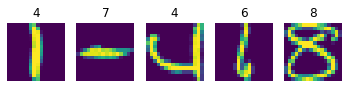

In [8]:
# K-Class Classifier Parameters:
Ker_Meth  = "Poly"
n_classes = 10
n_epochs  = 20

# Question 1b):
Testing_Error_per_run  = []
d_star_per_run         = []

# Question 1c):
confusion_matrix = []

# Question 1d):
prediction_mistake_count = np.zeros((Y_dataset.shape[0],1))

# Question 1b):
# Loop for 20 runs
for run in range(1,21):
    print("Run: {}".format(run))

    # 8:2 Split training + validation and testing set:
    # Index Shuffle for fitting:
    ran_sample_idx               = np.random.permutation(len(Y_dataset))
    split_pt                     = round(len(ran_sample_idx)*0.8)
    ran_trainvalidate_sample_idx = ran_sample_idx[:split_pt]
    ran_test_sample_idx          = ran_sample_idx[split_pt:len(ran_sample_idx)]
    n_train_validate_samples     = len(ran_trainvalidate_sample_idx)
    n_test_samples               = len(ran_test_sample_idx)
    
    # Loop for d from 1 to 7
    avg_validation_correct = [0]
    for Ker_para in range(1,8):
        print("d = {}".format(Ker_para))
        
        print("Precalculate Kernel...")
        KF  = KernelFunctor(Ker_Meth, Ker_para)
        tic = time.perf_counter()
        KN  = KF.kernel_fn(X_dataset) # Kernel matrix
        toc = time.perf_counter()
        print(f"**Kernel calculation finished in {toc - tic:0.4f} seconds")

        # 1b) 5 folds cross validation:
        validation_correct_all = []
        folds = 5
        for fold in range(0, folds):
            print(f"fold: {fold + 1}")

            # Get indicies for training set and validation set:
            data_train_idx, data_validate_idx = kFold(ran_trainvalidate_sample_idx, fold, folds)

            # Data sets:
            X_train              = X_dataset[data_train_idx]
            Y_train              = Y_dataset[data_train_idx]
            X_validate           = X_dataset[data_validate_idx]
            Y_validate           = Y_dataset[data_validate_idx]

            nsamples             = len(data_train_idx)

            # Initialize:
            alphas               = np.zeros((n_classes, nsamples))

            # Start Model:
            ovrop = OvR_OnlinePerceptron(alphas, KN, n_classes)

            for epoch in range(1, n_epochs + 1):
                tic    = time.time()
                alphas = ovrop.fit(data_train_idx, X_train, Y_train)
                toc    = time.time()
                
                print(f"**Training: Epoch {epoch} finished in {toc - tic:0.4f} seconds")
                epoch += 1
            
            # 1b) Validate:
            # ---------------Validation Accuracy-----------------
            validate_correct = 0

            kernel_vals      = KN[data_train_idx]
            kernel_vals      = kernel_vals[:, data_validate_idx]
            pred             = np.array(list(map(np.argmax, zip(*(alphas.dot(kernel_vals))))))
            validate_correct = len(np.where((Y_validate - pred) == 0)[0])
            
            # 1b )Record results:
            validation_correct_all.append(validate_correct)

        # 1b) Save all average validation correct for selection:
        avg_validation_correct.append(np.sum(validation_correct_all)/folds)
    
    # 1b) Select the best d (d*)
    d_star = np.argmax(avg_validation_correct)

    # 1b) Retrain using d* on full 80% training set
    print(f"Retrain using d* = {d_star}...")
    print("Precalculate Kernel...")
    KF  = KernelFunctor(Ker_Meth, d_star) # Use d_star
    tic = time.perf_counter()
    KN  = KF.kernel_fn(X_dataset) # Kernel matrix
    toc = time.perf_counter()
    print(f"**Kernel calculation finished in {toc - tic:0.4f} seconds")
    # Initialize:
    alphas = np.zeros((n_classes, n_train_validate_samples))

    # Start Model:
    ovrop = OvR_OnlinePerceptron(alphas, KN, n_classes)
    
    for epoch in range(1, n_epochs + 1):
        tic    = time.time()
        alphas = ovrop.fit(ran_trainvalidate_sample_idx, X_train, Y_train) # Full 80%
        toc    = time.time()
        
        print(f"**Training: Epoch {epoch} finished in {toc - tic:0.4f} seconds")
        epoch += 1
    
    # 1b) Test on testing set:
    # ---------------Testing Accuracy-------------------
    print("Testing...")
    X_test       = X_dataset[ran_test_sample_idx]
    Y_test       = Y_dataset[ran_test_sample_idx]
    Test_correct = 0

    kernel_vals  = KN[ran_trainvalidate_sample_idx]
    kernel_vals  = kernel_vals[:, ran_test_sample_idx]
    pred         = np.array(list(map(np.argmax, zip(*(alphas.dot(kernel_vals))))))
    Test_correct = len(np.where((Y_test - pred) == 0)[0])

    # 1c) Fill confusion matrix:
    confusion_matrix_per_run = np.zeros((10,10)) # 0 - 9
    label_count = np.zeros((10,1))
    for i, j in zip(Y_test, pred):
        label_count[i] += 1
        if i != j:
            confusion_matrix_per_run[i,j] += 1
    confusion_matrix_per_run = confusion_matrix_per_run/label_count
    
    # 1b) Record test error and mean d*
    Test_error = (n_test_samples - Test_correct)/n_test_samples
    Testing_Error_per_run.append(Test_error)
    d_star_per_run.append(d_star)

    # 1c) Record confusion matrix:
    confusion_matrix.append(confusion_matrix_per_run)

    # 1d) 5 worst data:
    print("Prediction mistake count...")
    kernel_vals  = KN[ran_trainvalidate_sample_idx]
    pred         = np.array(list(map(np.argmax, zip(*(alphas.dot(kernel_vals))))))
    for i in range(Y_dataset.shape[0]):
        if Y_dataset[i] != pred[i]:
            prediction_mistake_count[i] += 1
            
worst_5_idx = np.argsort(-prediction_mistake_count.T)[0,:5]

print("Results 1b):")
print(f"Testing error per run: {Testing_Error_per_run}")
print(f"d* per run: {d_star_per_run}")
print(f"Mean and STD of testing error: {np.mean(Testing_Error_per_run)} +- {np.std(Testing_Error_per_run)}")
print(f"Mean and STD of d*: {np.mean(d_star_per_run)} +- {np.std(d_star_per_run)}")

print("\nResults 1c):")
print(f"Mean confusion matrix:")
print(np.mean(confusion_matrix, axis = 0))
print(f"STD confusion matrix:")
print(np.std(confusion_matrix, axis = 0))

print("\nResults 1d):")
plot_idx = 1
for idx in worst_5_idx:
    plt.subplot(1, 5, plot_idx)
    img = np.reshape(X_dataset[idx], (16,16))
    plt.imshow(img)
    plt.axis('off')
    plt.title('%d' % Y_dataset[idx])
    plot_idx += 1